## Importing Necessary Libraries

In [1]:
# importing libraries to avoid warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing necessary libraries for data inspection and visualizing the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [3]:
# code for displaying complete rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [4]:
# importing some statistical libraries for variable check
from scipy.stats import shapiro

In [5]:
# importing necessary libraries for model building
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [6]:
# reading the data into dataframe
housing_dataframe = pd.read_csv('train.csv')

## Data Inspection

In [7]:
# checking the head of the dataframe
housing_dataframe.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL     65.00000     8450   Pave   NaN      Reg   
1   2          20       RL     80.00000     9600   Pave   NaN      Reg   
2   3          60       RL     68.00000    11250   Pave   NaN      IR1   
3   4          70       RL     60.00000     9550   Pave   NaN      IR1   
4   5          60       RL     84.00000    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0   196.00000        Gd        TA      PConc       Gd       TA           No   
1     0.00000        TA        TA     CBlock       Gd       TA           Gd   
2   162.00000        Gd        TA      PConc       Gd       TA           Mn   
3     0.00000        TA        TA     BrkTil       TA       Gd           No   
4   350.00000        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [8]:
# checking the shape of the dataframe
housing_dataframe.shape

(1460, 81)

In [9]:
# checking columns of the dataframe
housing_dataframe.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
# checking info of the dataframe
housing_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## EDA

- EDA is performed before data cleaning in order to understand the data in its raw format. Upon performing EDA we will get to know the feature importances in relation with target variable. Through visual analysis feature importances in relation target variable can be estimated but inorder to strengthen the argument we can use statistical feature importance methods like pearson's R correlation, chi-square statistical methods etc. <br> <br>
- Target variable : SalePrice
- Rest all other are independent variables which will be used in model building.
- EDA on the data is being performed on some of the columns of the data and will be performed as follows:
    - Univariate Analysis
        - Numerical column analysis
        - Categorical column analysis
    - Bivariate Analysis
        - Analysis of categorical columns in relation with target variable
        - Analysis of numerical columns in relation with target variable
    - Pair wise analysis
        - Pairplot analysis of numerical columns analysis
        - Pair wise correlation analysis of numerical columns using heatmap

In [11]:
# defining numerical columns 
numerical_columns_list = ['LotFrontage', 'LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2', 
                     'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF',
                     'LowQualFinSF', 'GrLivArea','GarageArea','WoodDeckSF', 'OpenPorchSF',
                     'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal']

In [12]:
# defining categorical columns of the dataframe
categorical_columns_list = ['MSSubClass', 'MSZoning','Street','Alley', 'LotShape', 'LandContour','Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2','BldgType','HouseStyle', 'OverallQual', 'OverallCond',
        'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType','ExterQual', 'ExterCond', 'Foundation', 
        'BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2','Heating','HeatingQC', 'CentralAir', 
        'Electrical','BsmtFullBath', 'BsmtHalfBath', 'FullBath','HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
        'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType','GarageFinish', 'GarageCars',
        'GarageQual','GarageCond', 'PavedDrive','PoolQC','Fence','SaleType','SaleCondition','MiscFeature','MoSold']

In [13]:
# defining year columns list
year_columns_list = ['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']

### Univariate Analysis

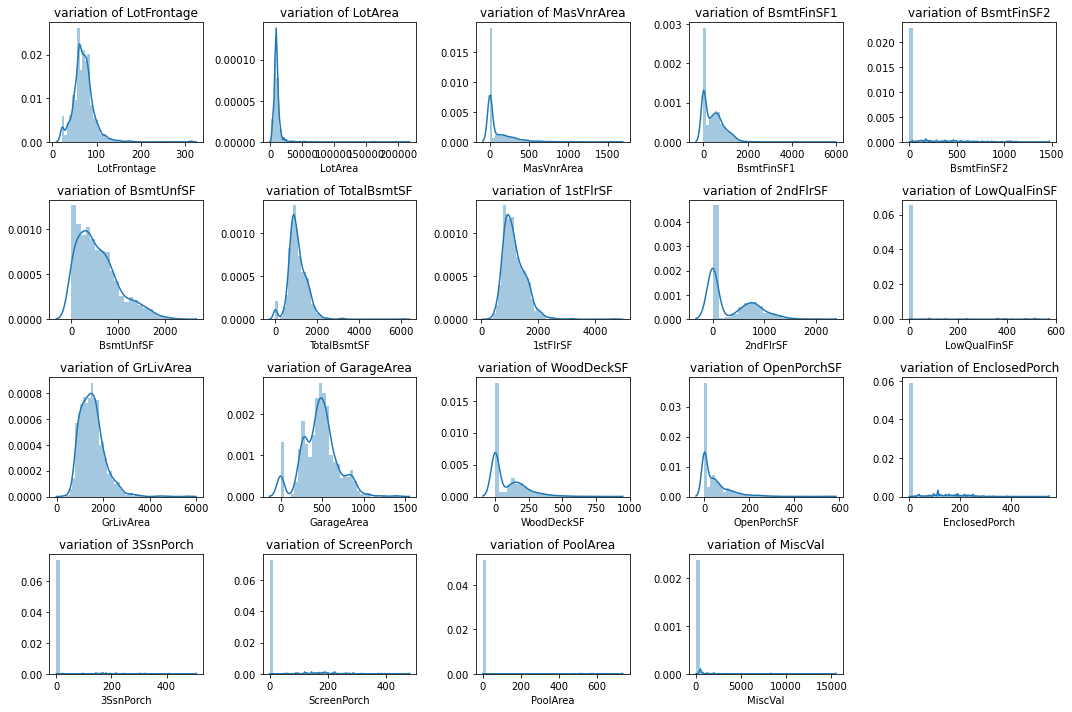

In [14]:
# analyzing the distribution of the numerical column
plt.figure(figsize= (15,10))
for index, column_name in enumerate(numerical_columns_list):
    plt.subplot(4,5, index+1)
    sns.distplot(housing_dataframe[column_name].dropna())
    plt.title('variation of ' + column_name)
plt.tight_layout()
plt.show()

- From distributions we can get to know that most of the columns are either skewed to their left or right and some distributions are even multimodal distributions meaning distributions having more than one mode. Having such skewed distributions it is an indication that there exists outliers in each of the variable. But since we are taking care of the distribution of target variable to be normal distribution we need to not treat the outliers present in predictor variables. The above charts showcases the variation of numerical variables which are majorily in terms of square feet.

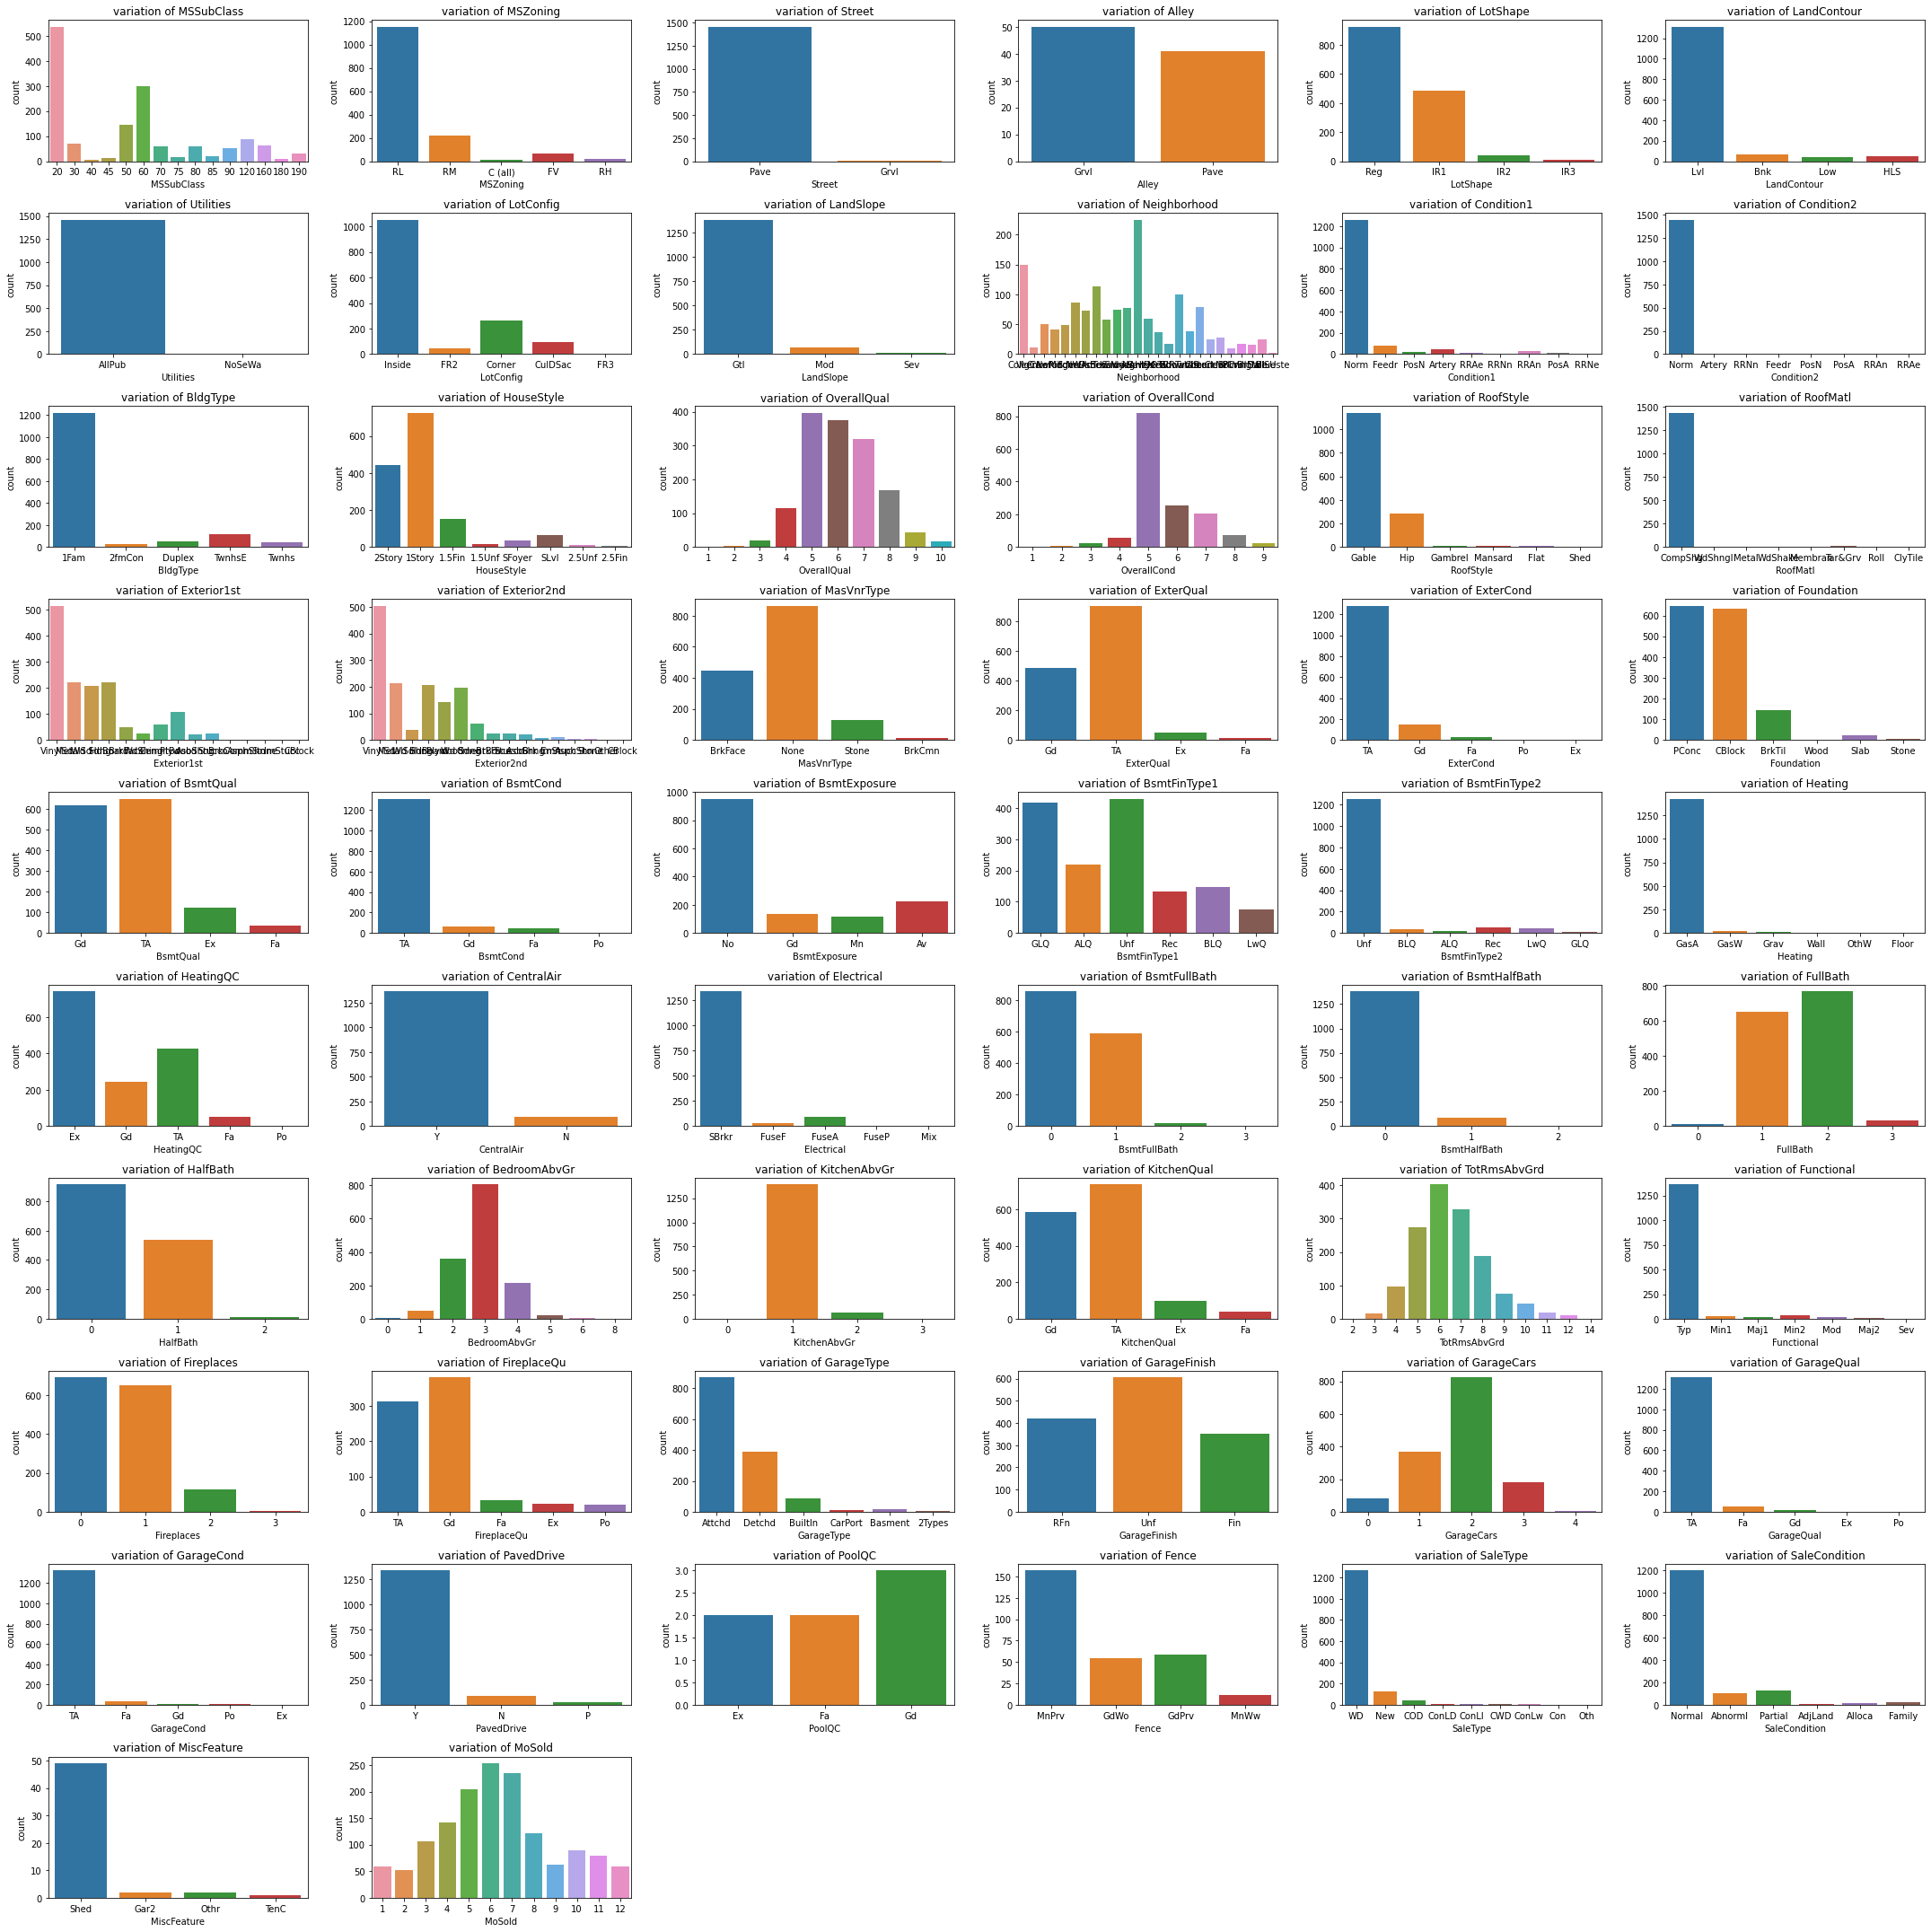

In [15]:
# analyzing categorical columns
plt.figure(figsize= (30,30))
for index, column_name in enumerate(categorical_columns_list):
    plt.subplot(10,6,index+1)
    sns.countplot(housing_dataframe[column_name].dropna())
    plt.title('variation of ' + column_name)
plt.tight_layout()
plt.show()

- The above charts showcases the variation in each of the categorical variable within its class variable. In some features we can see that there exists one of the class to be dominant which is an clear indication of skewness present in such features. Before modelling it is better to drop such features otherwise the model will be predicting only the dominant class within the feature majority of the times.

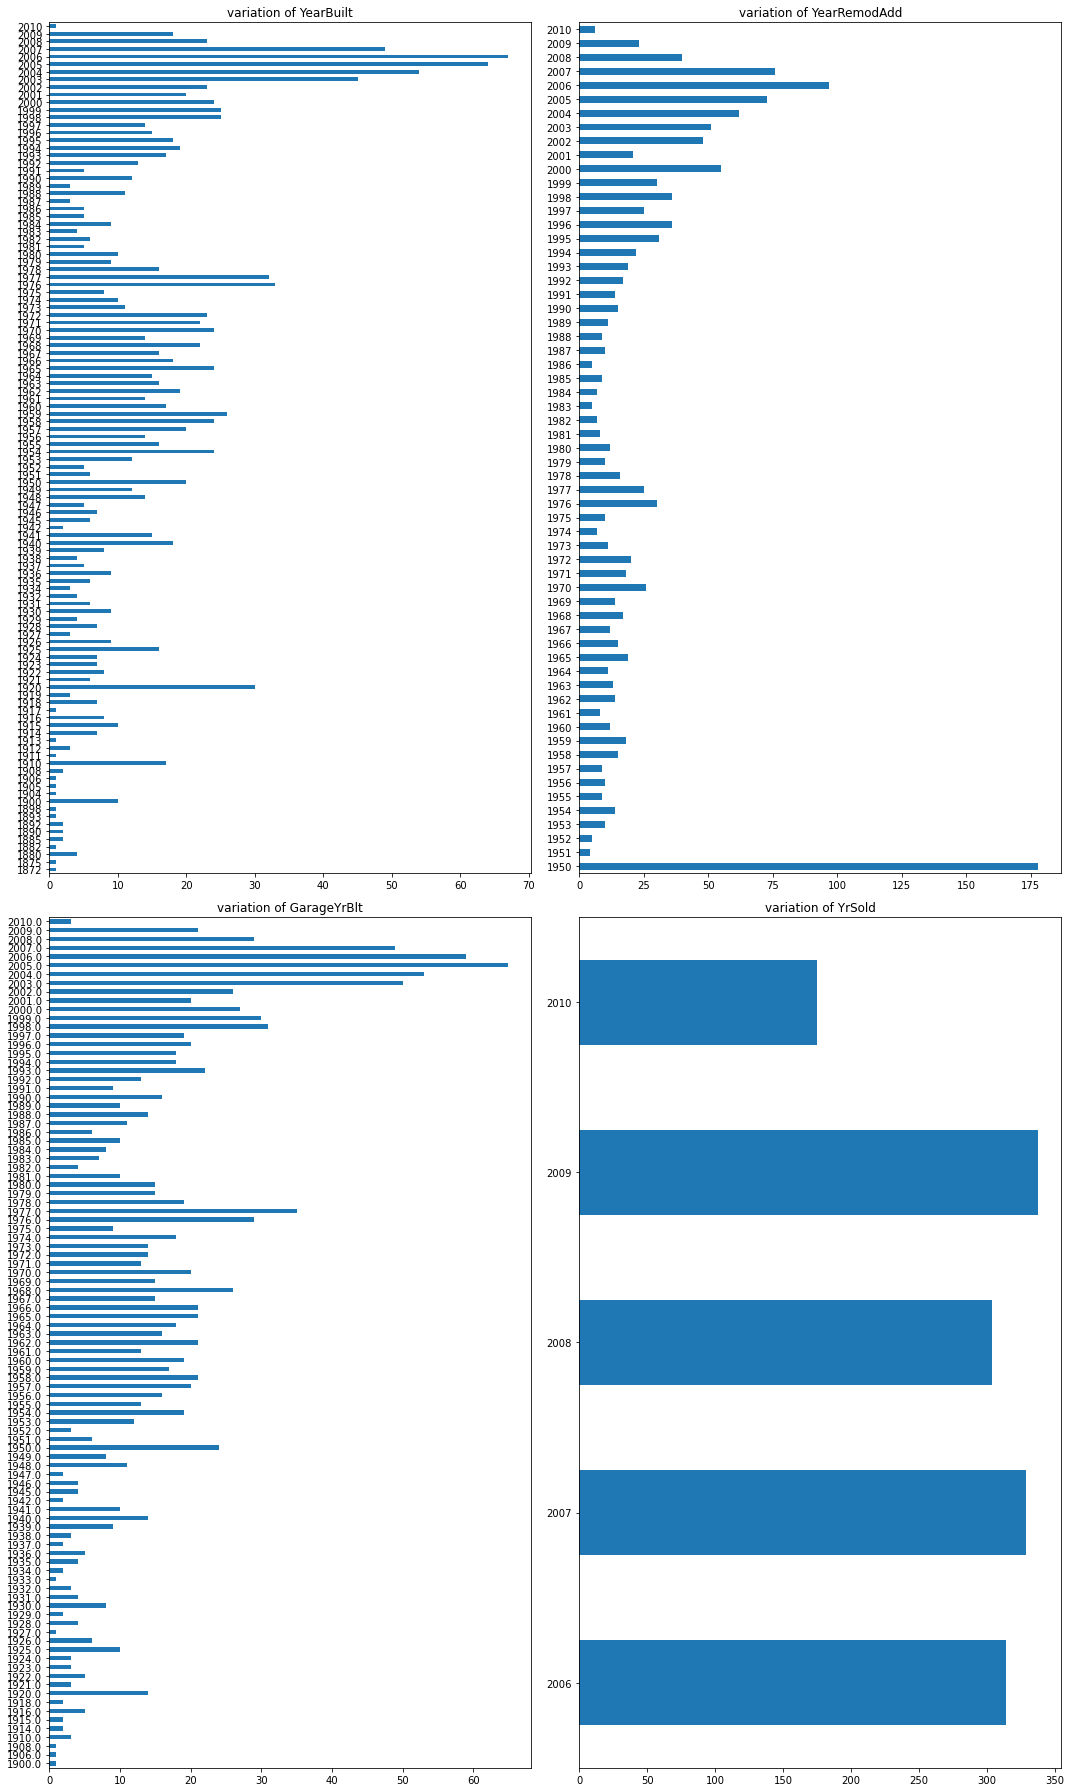

In [16]:
# analyzing the variation present in year columns
plt.figure(figsize= (15,25))
for index, column_name in enumerate(year_columns_list):
    plt.subplot(2,2, index+1)
    housing_dataframe[column_name].dropna().value_counts().sort_index(ascending = True).plot.barh()
    plt.title('variation of ' + column_name)
plt.tight_layout()
plt.show()

- From the above plot we can see that across the years the variation is compelety dynamic. There is no steady increase or decrease in the variation across the years. But one observation can be made from all the charts that is in the year 2010 the count has been decreased drastically across all charts.

### Bivariate Analysis

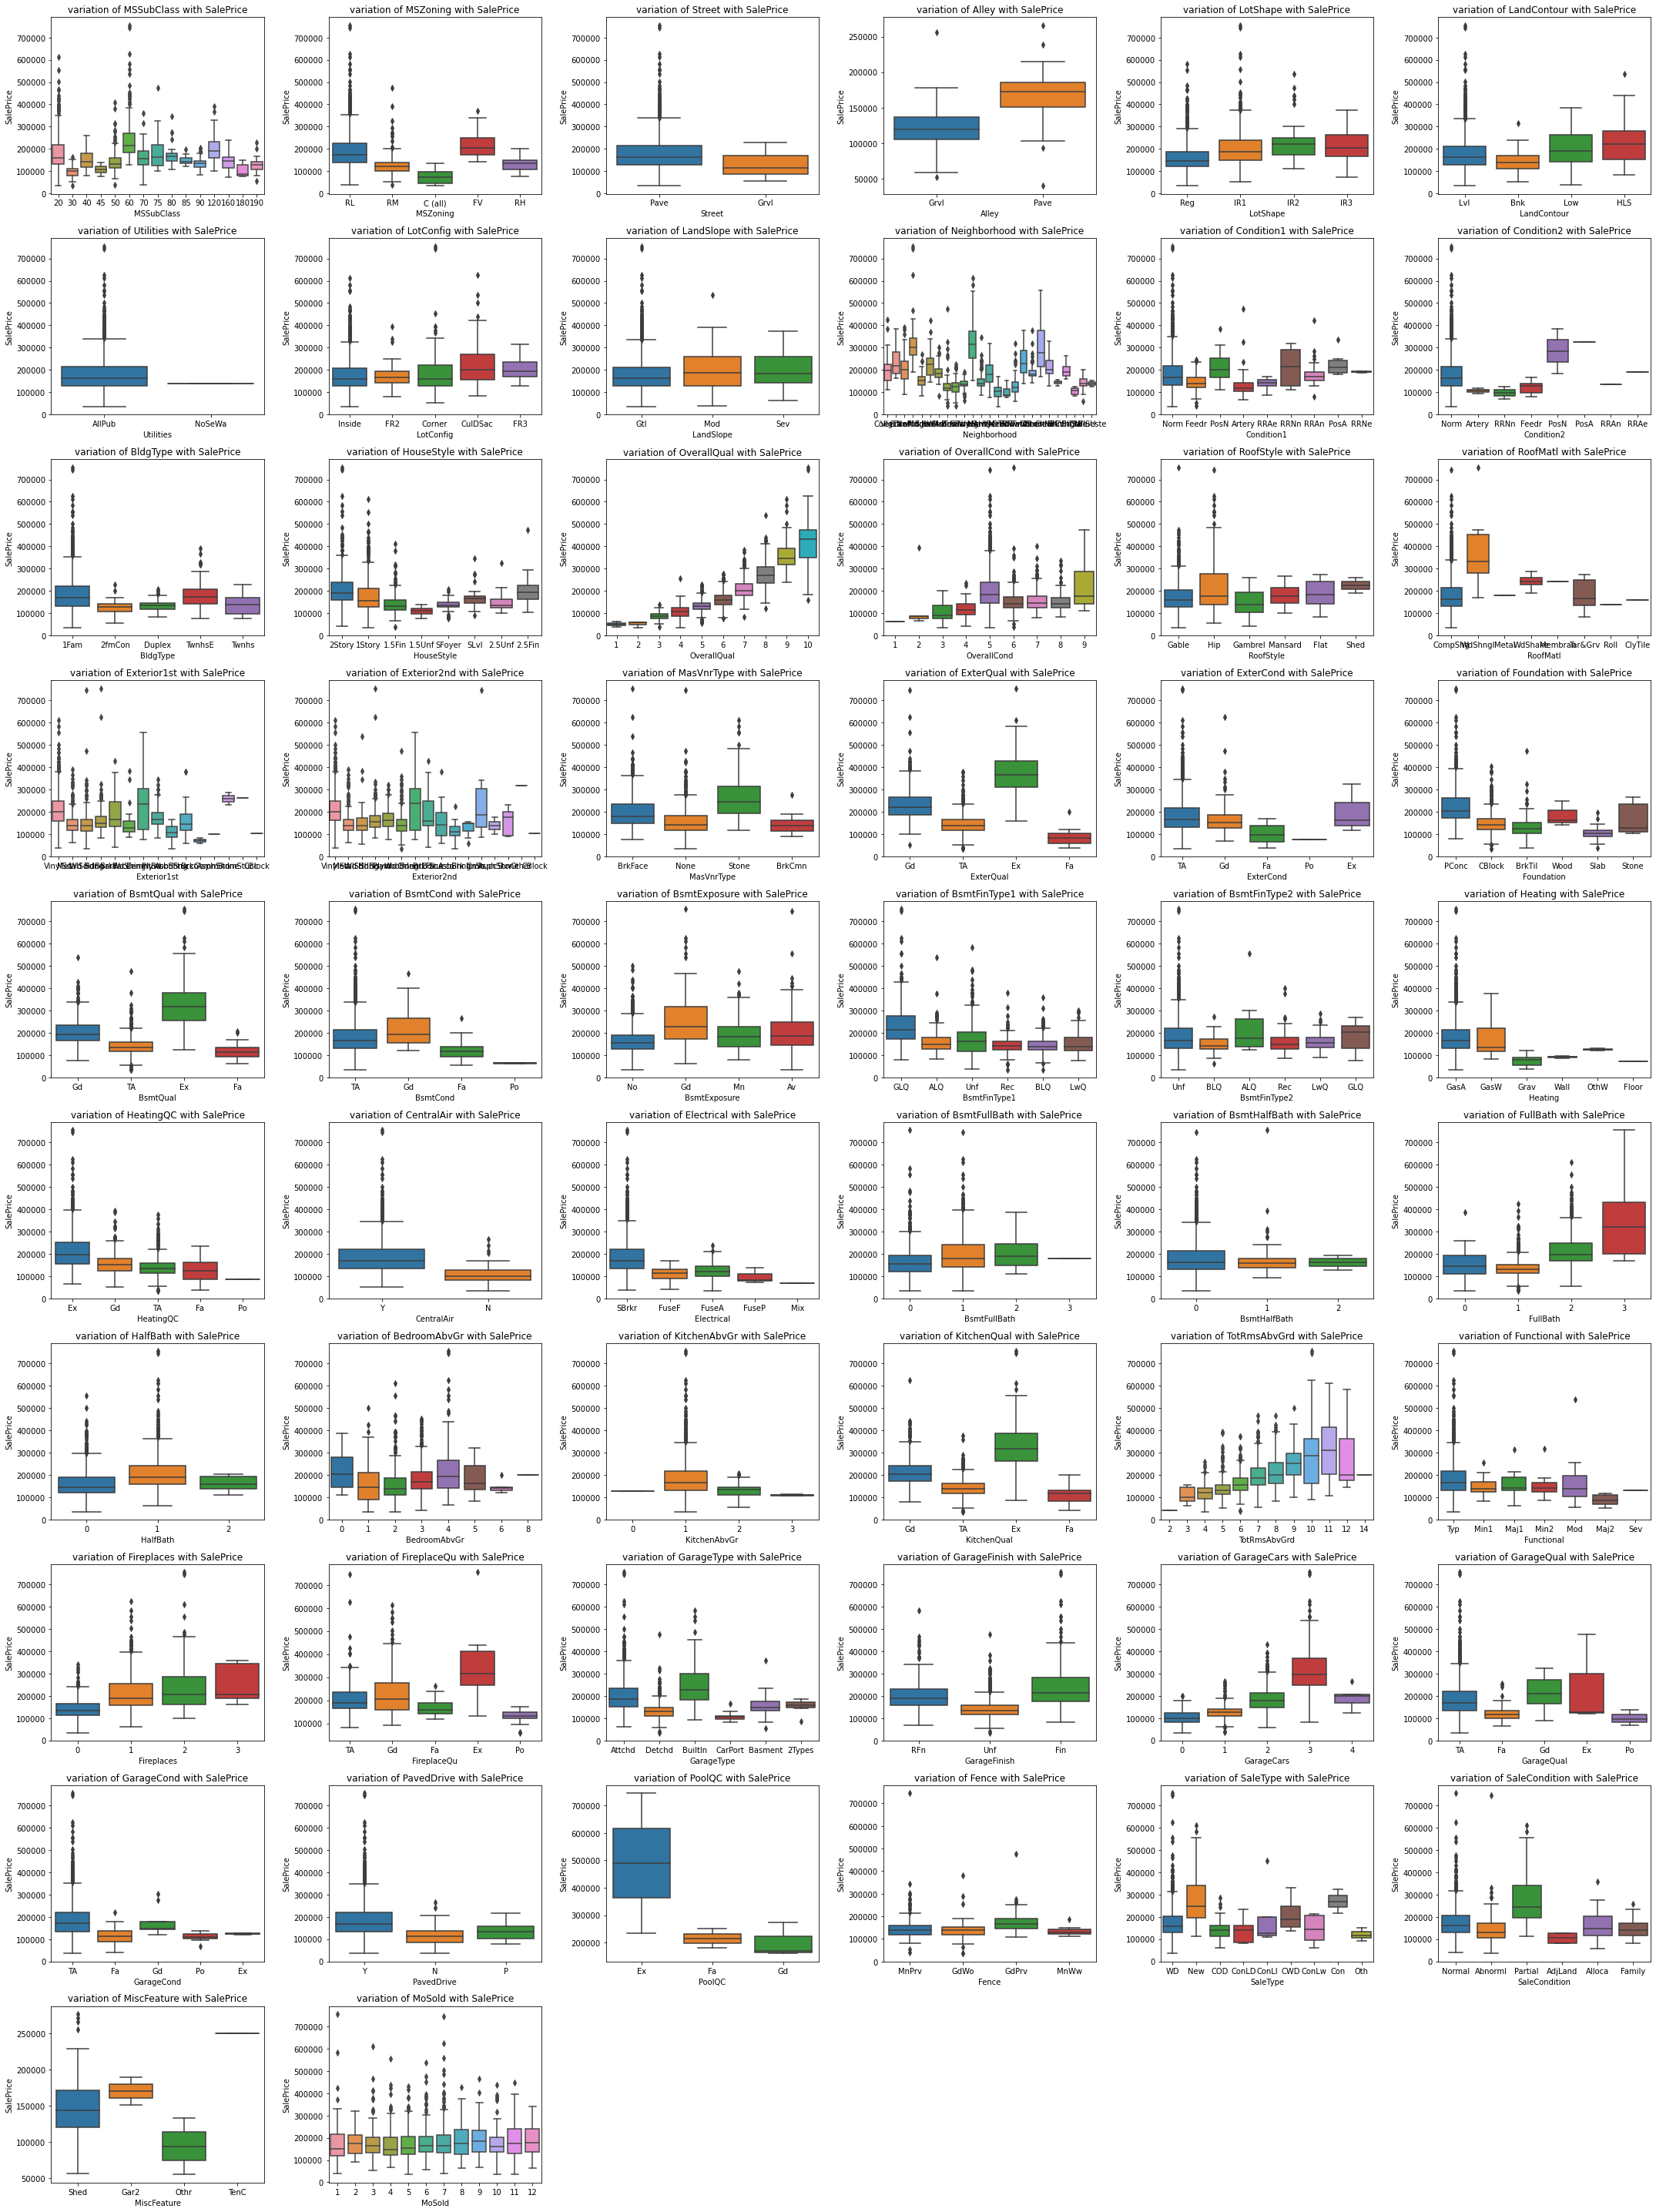

In [17]:
# analysis of categorical variables in relation with Target variable
plt.figure(figsize= (30,40))
for index, column_name in enumerate(categorical_columns_list):
    plt.subplot(10,6, index+1)
    sns.boxplot(housing_dataframe[column_name], housing_dataframe['SalePrice'])
    plt.title('variation of ' +column_name + ' with SalePrice')
plt.tight_layout()
plt.show()

- From above plots we can analyze the variation between categorical columns in relation with target variable. Since there exists many columns let's consider some 10~18 columns randomly covering all varieities of categorical columns and analyze them in relation with the target variable.

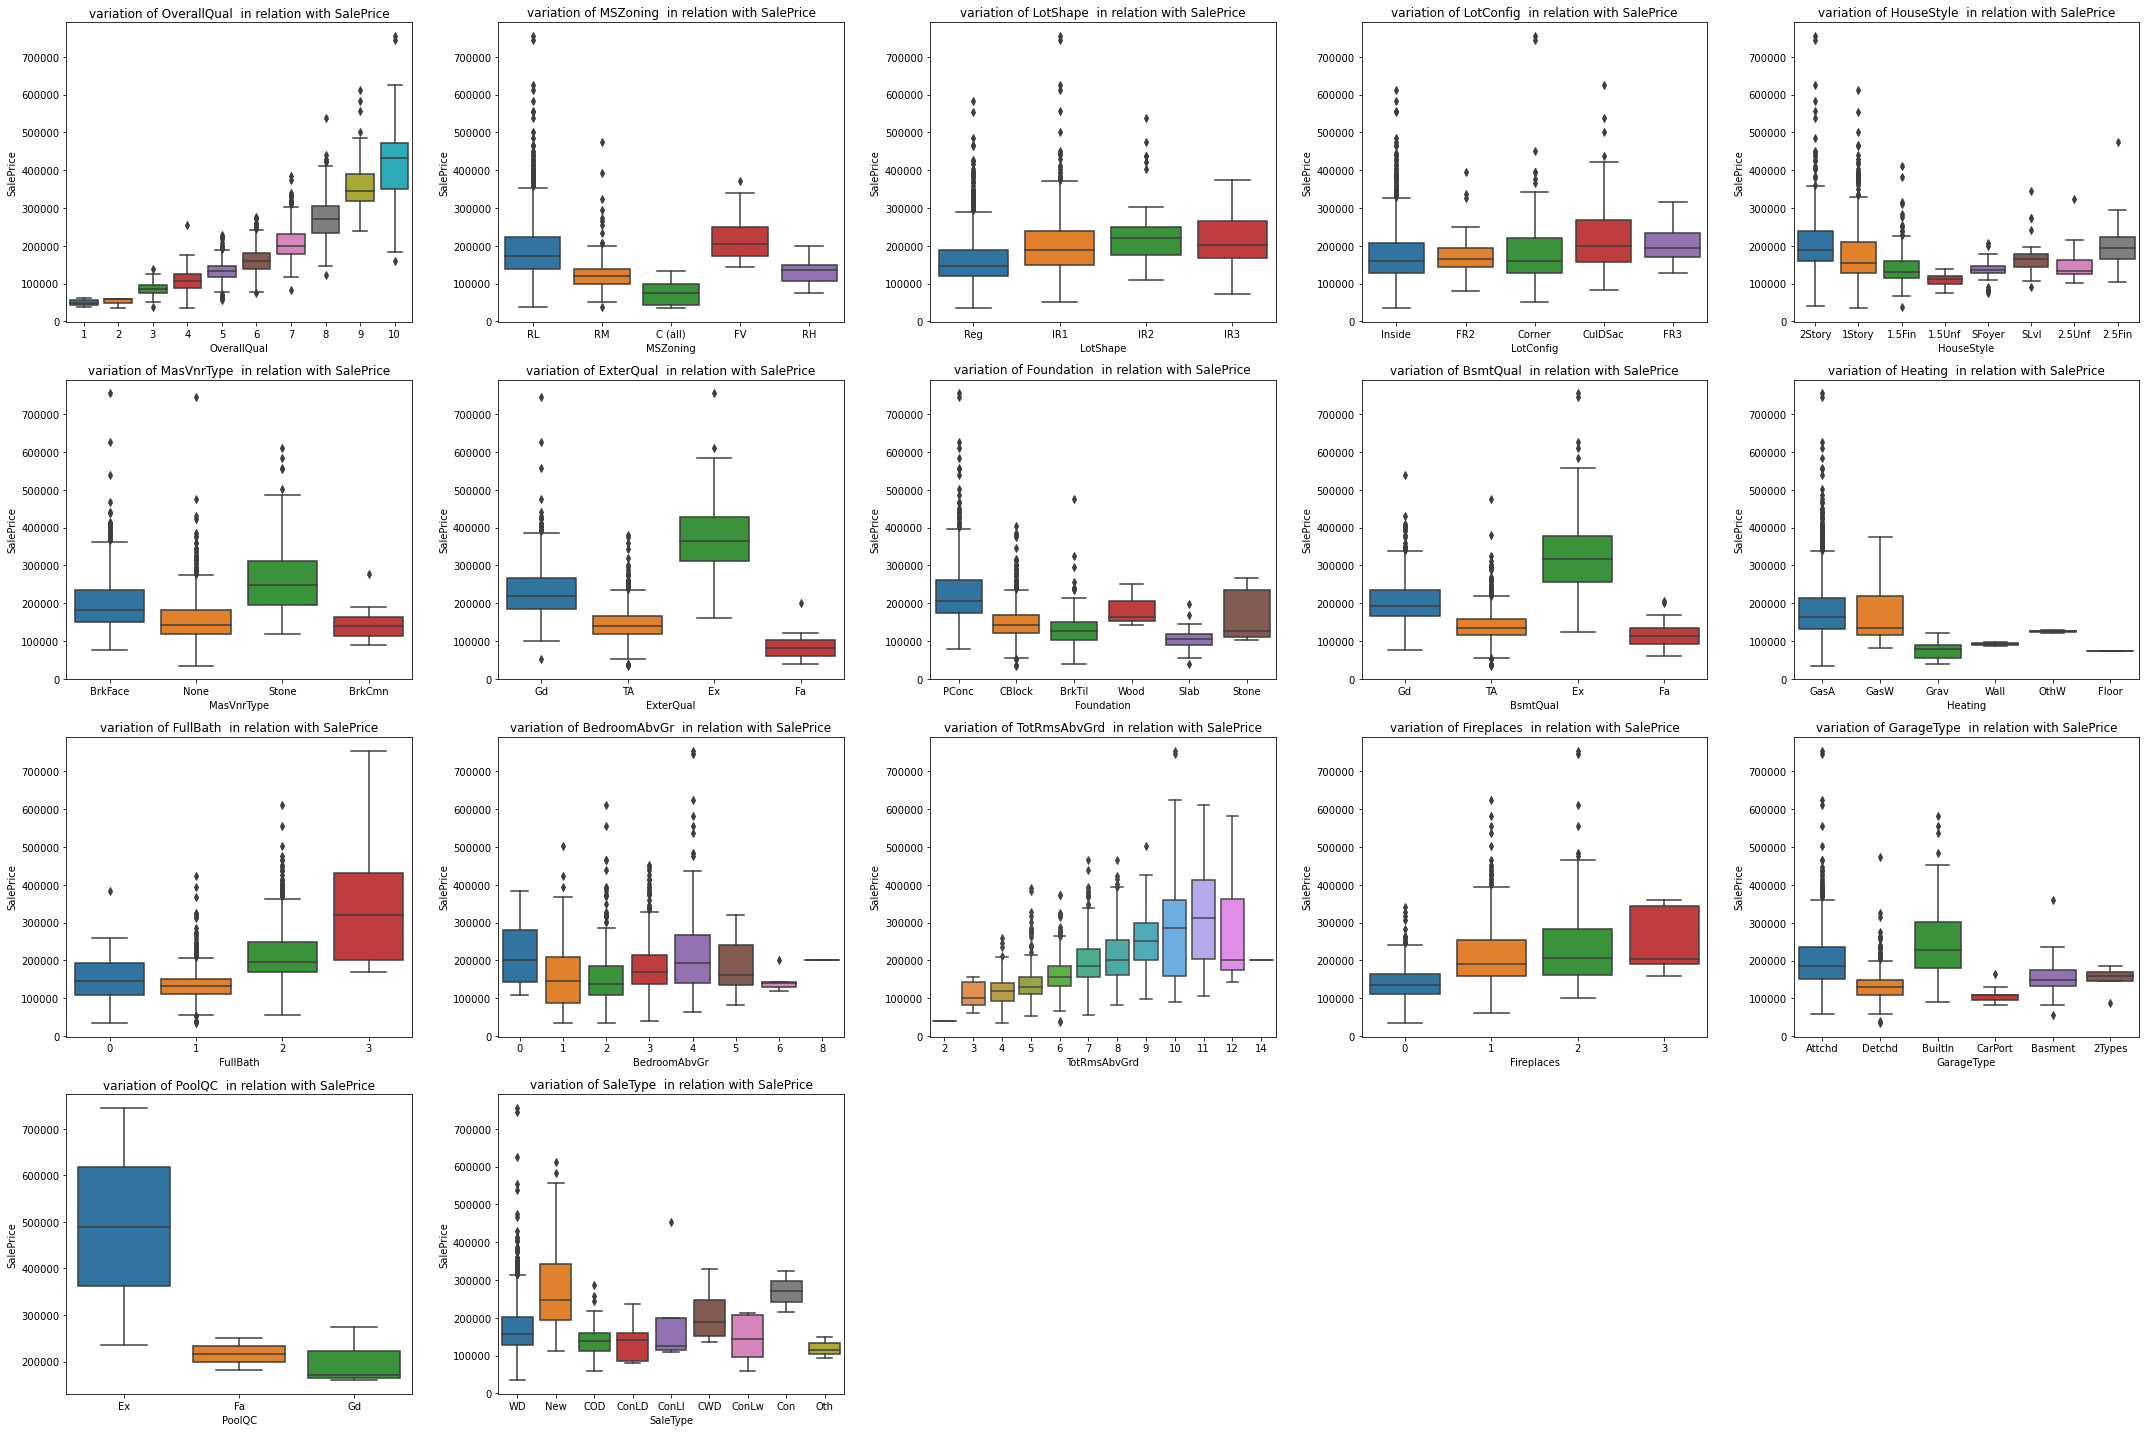

In [18]:
# analyzing the variation in specific with some radom columns in relation with target variable
random_categorical_columns = ['OverallQual', 'MSZoning','LotShape','LotConfig','HouseStyle','MasVnrType','ExterQual',
                              'Foundation','BsmtQual','Heating','FullBath','BedroomAbvGr','TotRmsAbvGrd','Fireplaces',
                             'GarageType','PoolQC','SaleType']
plt.figure(figsize= (30,20))
for index, column_name in enumerate(random_categorical_columns):
    plt.subplot(4,5, index+1)
    sns.boxplot(housing_dataframe[column_name], housing_dataframe['SalePrice'])
    plt.title('variation of ' + column_name + '  in relation with SalePrice')
plt.tight_layout()
plt.show()

__The following Inferences can be made from above plots__:
- The median value gradually increases across different classes of overall material and finish in relation with target variable. Which is an clear indication that as the overall quality of the property increases the price of the property increases.
- From the variation of MSZoning in relation with target variable we can see that initially median value price of the property decreases across the classes then increases and finally decreases. Which is an clear indication that as the zoning nature varies the price of the property varies. We can see that for FV(Floating Village Residential) zone the median value of property high when compared to all other zoning. But the variation in price is more in RL(Residential Low Density) zone area.
- The is no much variation between lot shape and sale price. But there exists more variation in price for IR1(Slightly irregular) shape of the property when compared to other lot shapes.
- There is no much variation between lot config and sale price. There exists more variation in price for Inside lot when comapred to other lot configuration though there exists one extreme outlier for the lot located at the croner.
- As the house style becomes basic the price of the property decrease. There exists more variation in price for the properties which are two story lots.
- The median value of properties which have stone masonry veneer is high when compared to other masonry veneer finishings. Though there exists more variation in price for properties have brick face masonry veneer finishing.
- Similarly as the Exterior material quality of the property is rich the price of the property lies on the higher side when compared to other exterior material quality finishings.
- If the foundation of the property is of Poured Concrete the price of the property lies on the higher side and also variation in price for such properties is more when compared to other foundation type properties.
- For excellent basement quality the price of the property lies on higher range.
- For Gas forced warm air furnace equiped properties the price is on higher range when compared to other heating types.
- If the number of full bathrooms increases the price of the property is increases. Hence properties with 3 full bathrooms have higher price when compared to other number of full bathrooms equiped properties.
- There exists more variation in price of the properties having bedrooms above grade = 4.
- As the total rooms in the property increases there has been gradual increase in price of the proerpty upto 11 rooms. But suddenly for the properties having 12 rooms the price has been drastically reduced.
- Properties having 2 fireplaces have slight price on higher side when compared to other properties having different number of fireplaces.
- Properties having BuiltIn garage have highe price when compared to other garage types.
- Properties having pool quality excellent have very high price when compared to other pool quality properties. Also the variation in price is more for the properties having pool quality excellent.
- Properties which are just constructed and being sold have higher price when compared to other sale types.

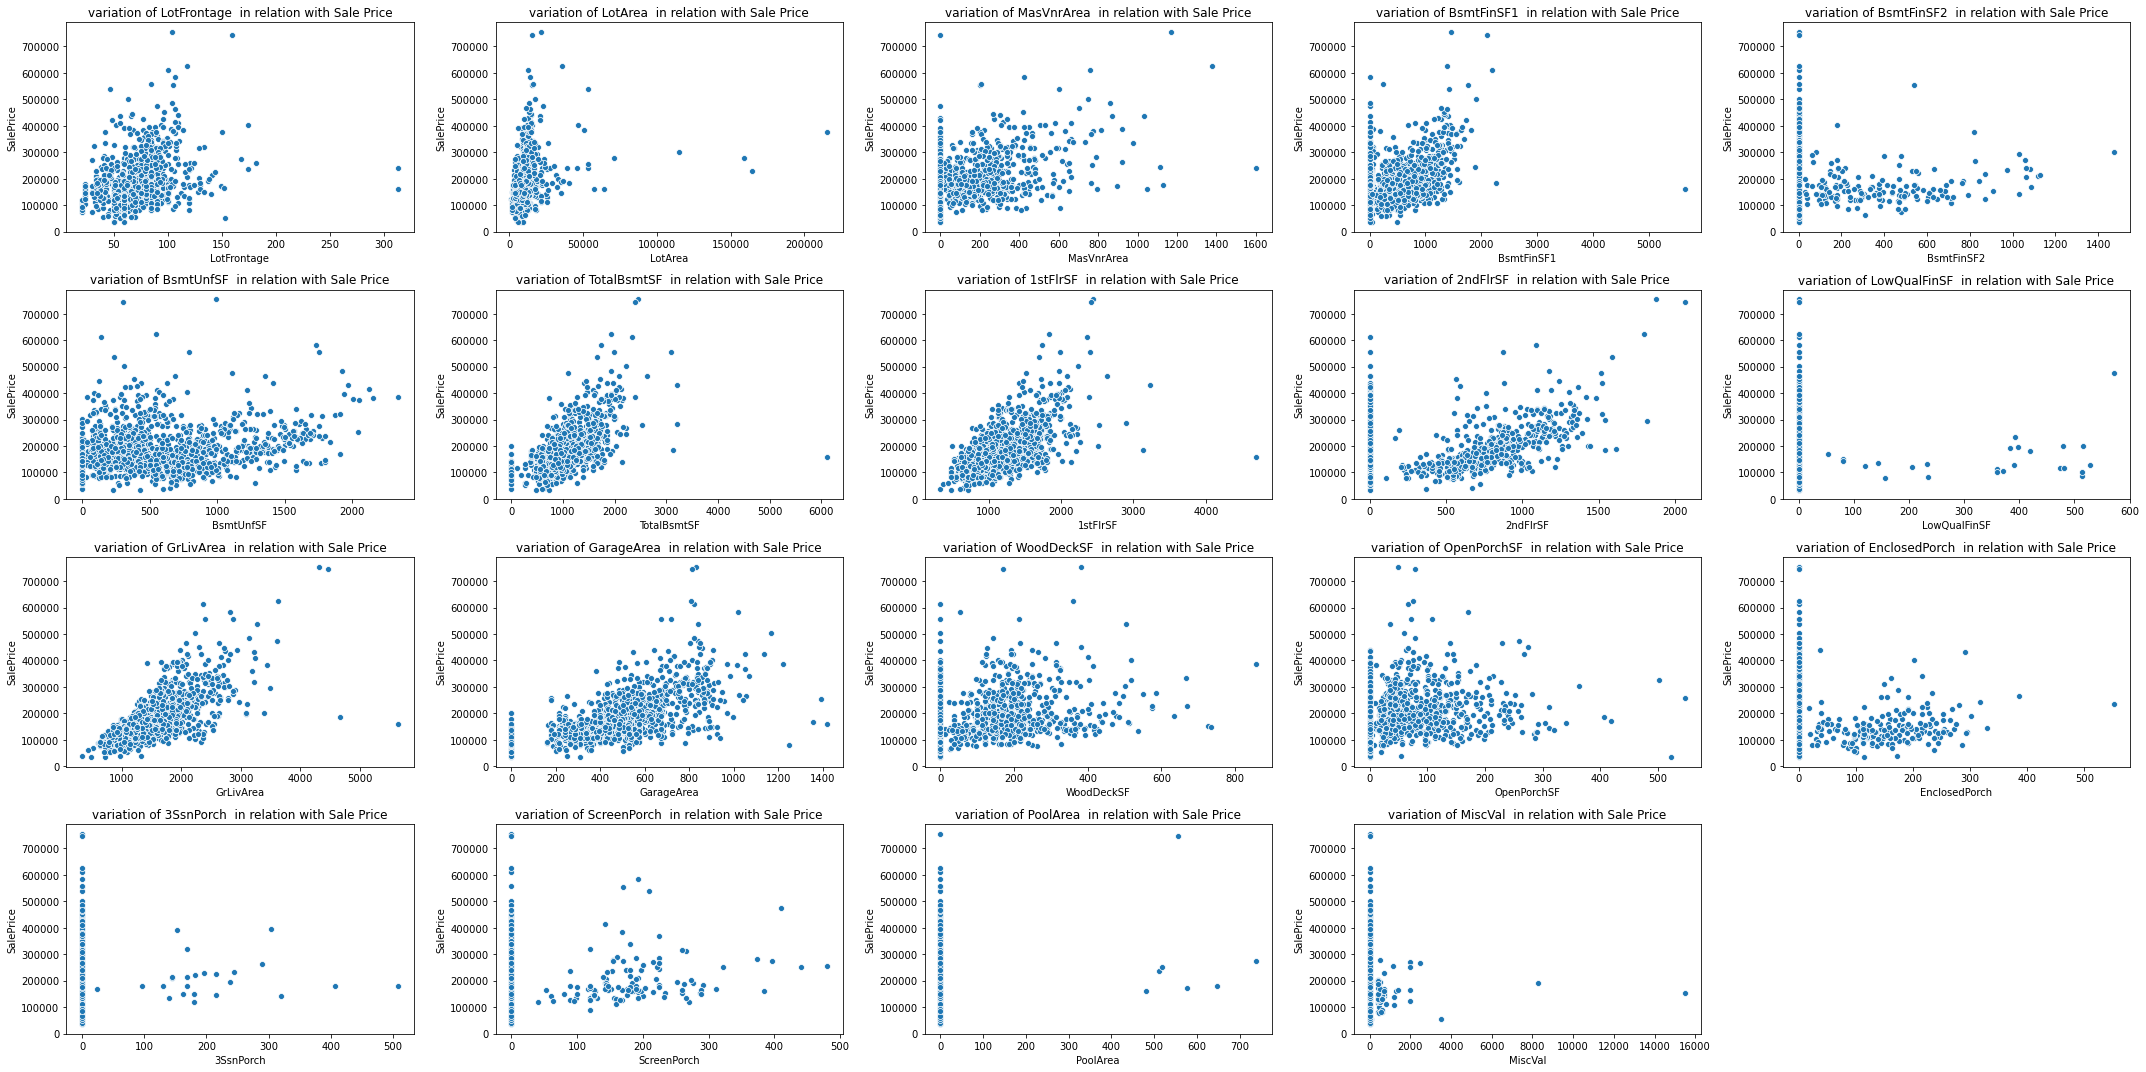

In [19]:
# analyzing the variation of numerical columns in relation with target variable
plt.figure(figsize= (30,15))
for index, column_name in enumerate(numerical_columns_list):
    plt.subplot(4,5,index+1)
    sns.scatterplot(housing_dataframe[column_name], housing_dataframe['SalePrice'])
    plt.title('variation of '+ column_name + '  in relation with Sale Price')
plt.tight_layout()
plt.show()

__The following Inferences can be made:__
- There exists some sort incremental variation between the feature and the target variable which are as folows:
    - Steap increase the sale price for the properties having lot area less than 10,000 sq.ft
    - Gradual increase in sale price for the properties having Type 1 finished sq.ft less than 2000 sq.ft
    - Gradual increase in sale price for the properties having total basement sq.ft less than 3000 sq.ft
    - Gradual increase in sale price for the properties having first floor sq.ft less than 3000 sq.ft
    - Gradual increase in sale price for the properties having living ares sq.ft less than 4000 sq.ft
- In a nutshell we can see that as the square feet increases the price of the property increases. Let's quantify the relationship between features by analyzing using heatmap.

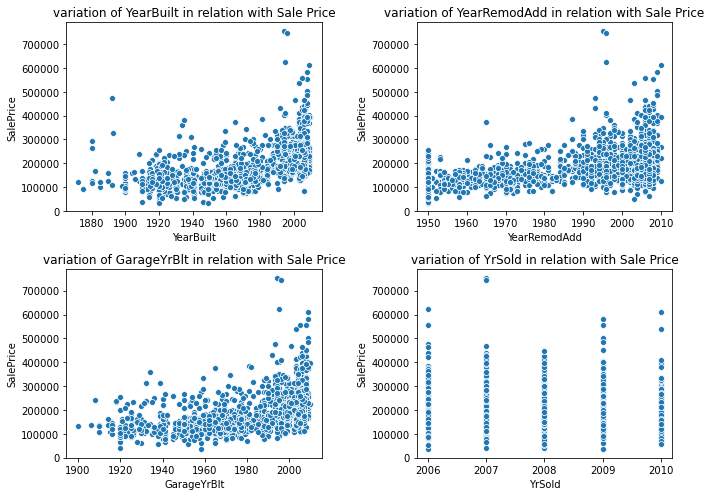

In [20]:
# analyzing year columns in relation with target variables
plt.figure(figsize= (10,7))
for index, column_name in enumerate(year_columns_list):
    plt.subplot(2,2, index+1)
    sns.scatterplot(housing_dataframe[column_name], housing_dataframe['SalePrice'])
    plt.title('variation of '+ column_name + ' in relation with Sale Price')
plt.tight_layout()
plt.show()

__The following inferences can be made:__
- The houses built in the latest years as per the scale of year when compared to houses built bit older have higher sale price.
- For the properties which have been remodelled newly as per the scale of year when compared to previous years have higher sale price.
- Garages which have been built in recent years as per the scale of year have higher sale price.
- Properties which have been sold across the years have almost similar variation in sale price with some outliers.

### Pair wise Correlations

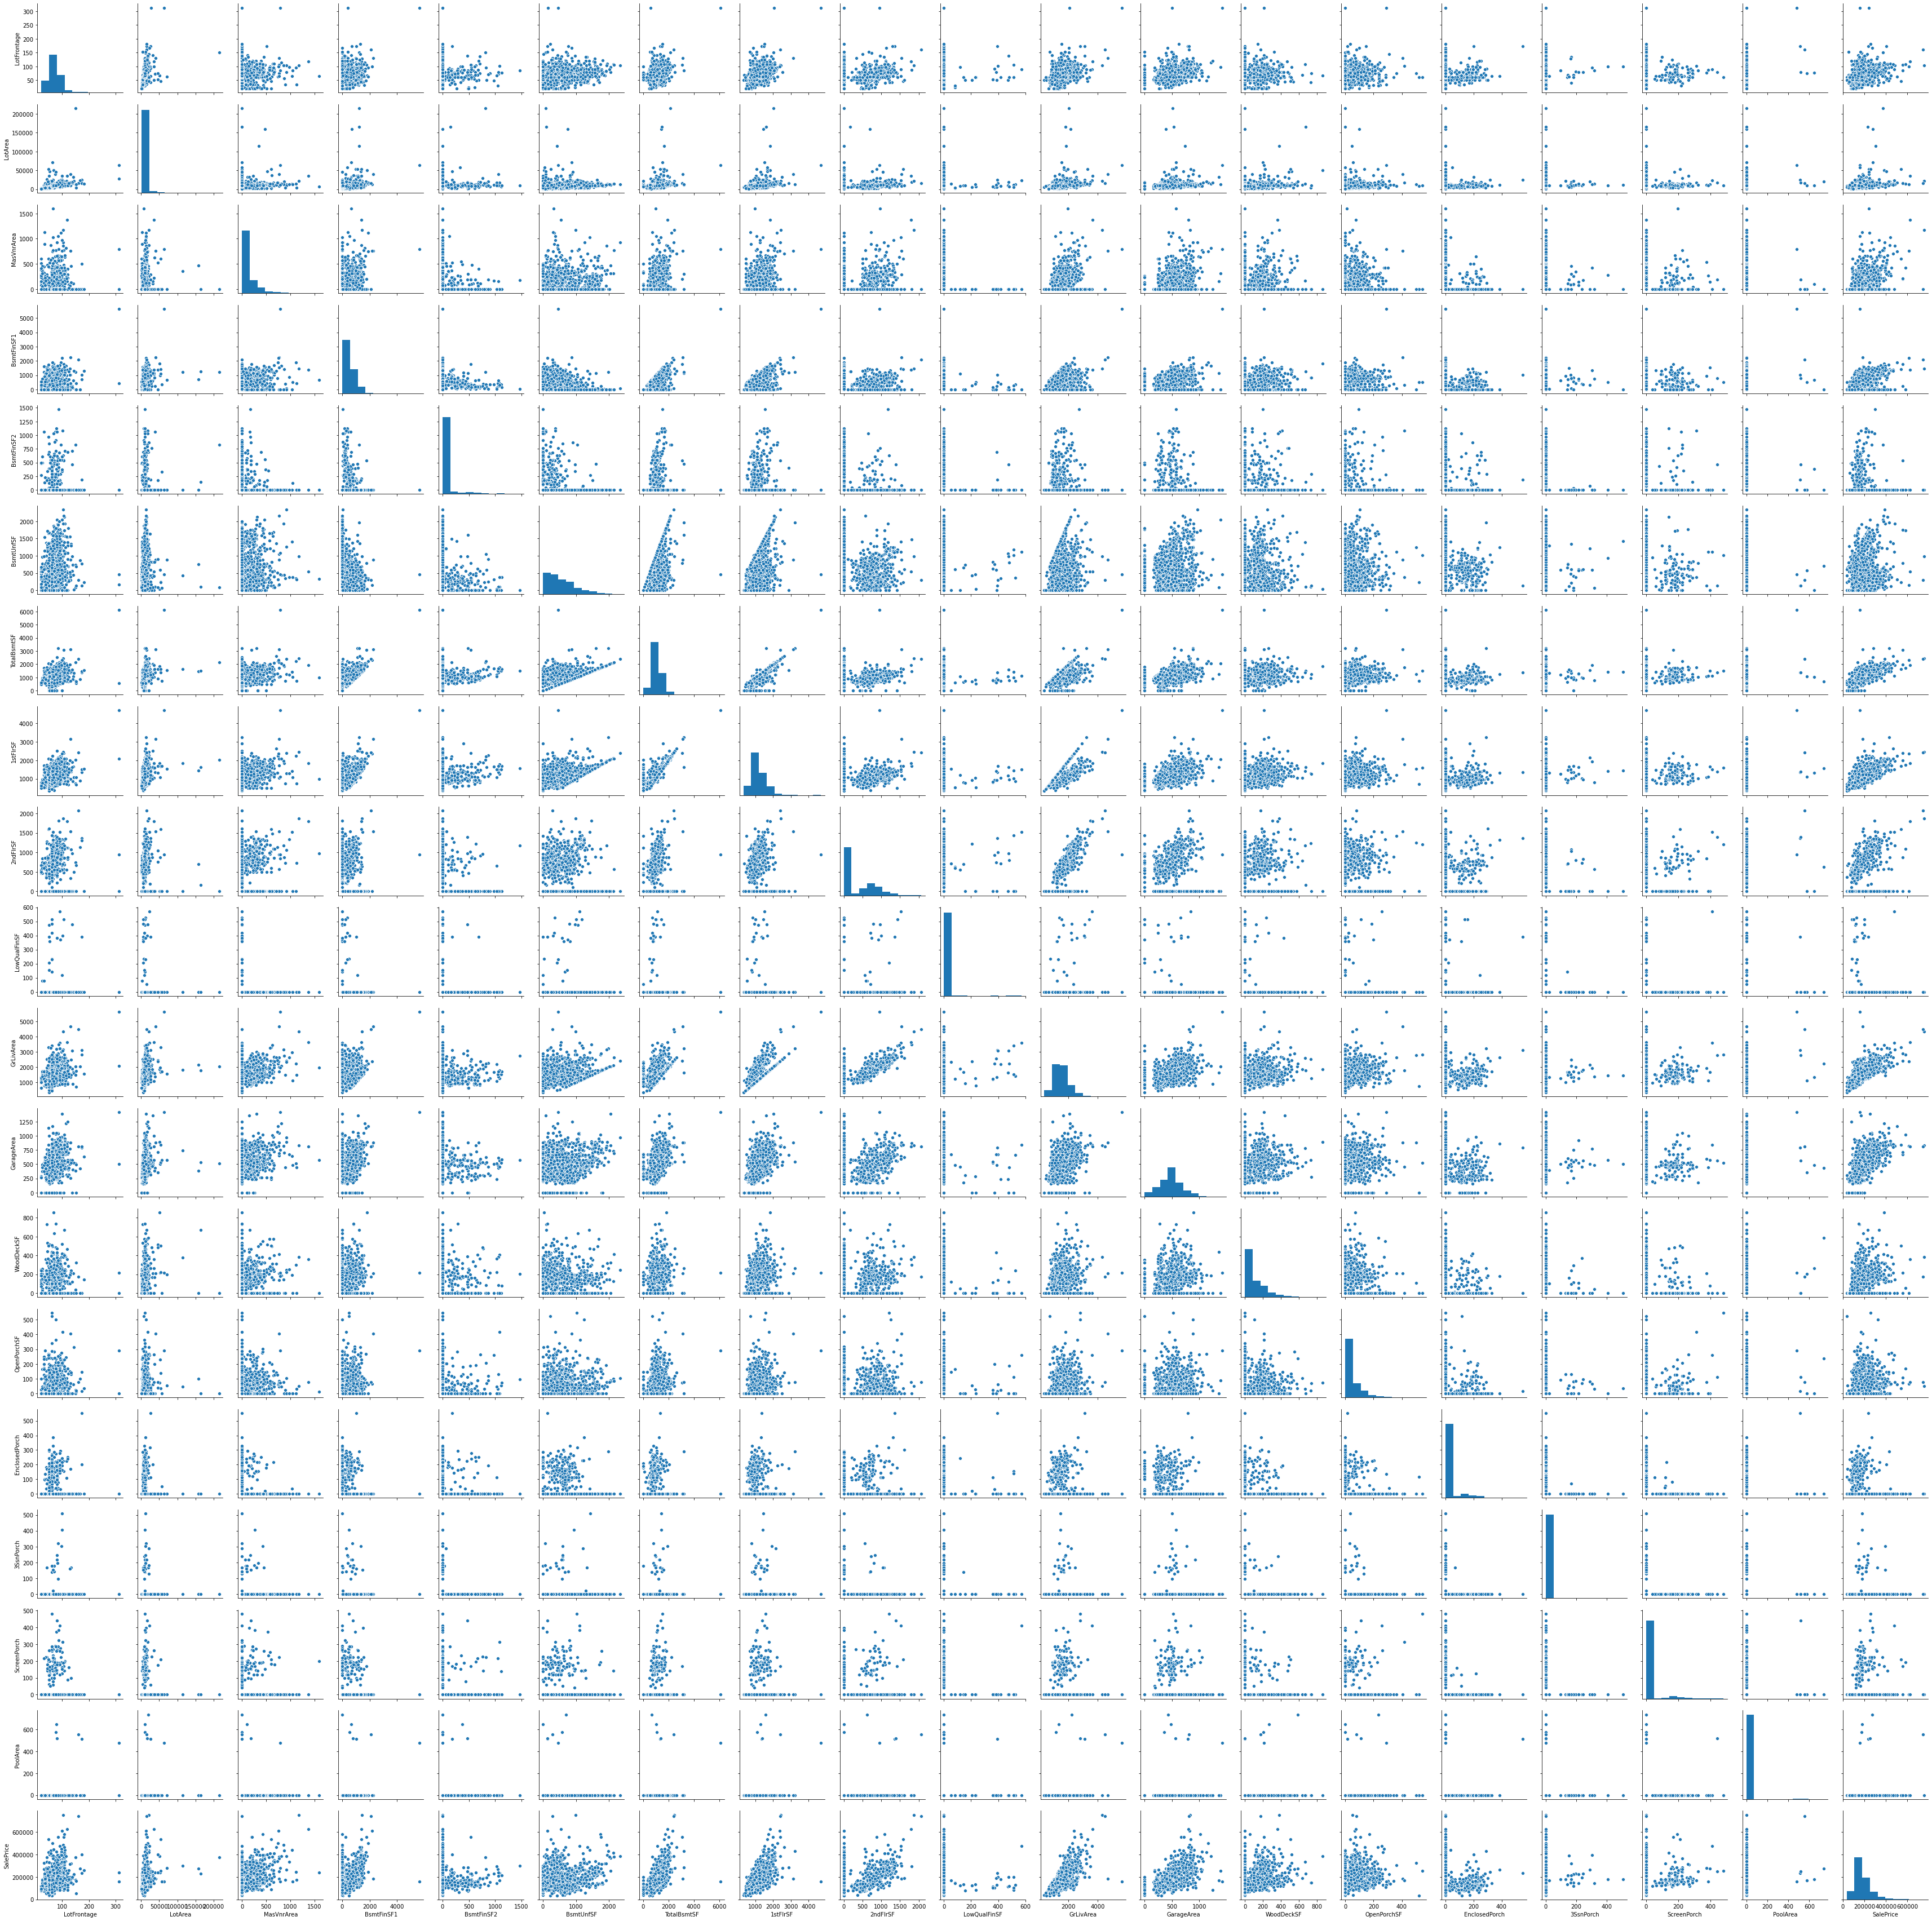

In [21]:
# plotting pair plot to get to know interaction between features and with target feature as well
sns.pairplot(housing_dataframe[['LotFrontage', 'LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2', 
                     'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF',
                     'LowQualFinSF', 'GrLivArea','GarageArea','WoodDeckSF', 'OpenPorchSF',
                     'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'SalePrice']], diag_kind= 'hist')
plt.show()

- From above pair plot we can get to know all possible numerical features relation with each other. Visualizing each pair plot and understanding the effectiveness of relationship would be quite challenging. Hence it is better to quantify their relationships using correlation heatmap plot.

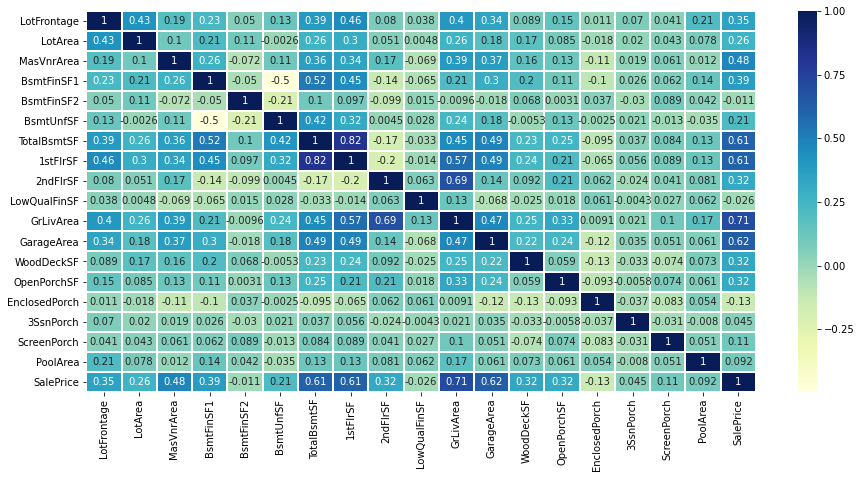

In [22]:
# analyzing the correlation between numerical features
corr_matrix = housing_dataframe[['LotFrontage', 'LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2', 
                     'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF',
                     'LowQualFinSF', 'GrLivArea','GarageArea','WoodDeckSF', 'OpenPorchSF',
                     'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'SalePrice']].corr()

# plotting the heat map using correlation matrix
plt.figure(figsize= (15,7))
sns.heatmap(corr_matrix, annot = True, cmap = 'YlGnBu', linecolor= 'white', linewidths= 1)
plt.show()

- The following observations can be made from the above plot:
- Correlations between target variable and predictor variables:
    - There exists strong positive correlation between:
        - Living Area sq.ft vs. Sale Price
        - Garage Area sq.ft vs. Sale Price
        - Total basement sq.ft vs. Sale Price
        - 1st floor sq.ft vs. Sale Price
        - Masonry Veneer area sq.ft vs. Sale Price
        - Basement Type 1 finish sq.ft vs. Sale Price
        - 2nd floor sq.ft vs. Sale Price
        - Lot footage sq.ft vs. Sale Price
        - Lot area sq.ft vs Sale Price
- Similarly there exists correlations between features which cause an issue of having multicollinearity. Pair wise correlations just signify the linear relationship between two variables but a feature can be related with more than one feature. But analyzing pair wise correlations will help in initial understanding about multicollinarity.
- These multicollinearity issues can be handled during model building. Since we are building linear regression model features should be free from multicollinearity as we want to make inference of features in relation with target variable.

## Data Cleaning

In [23]:
# checking for the missing values percentage across the columns
round(100*(housing_dataframe.isnull().sum()/housing_dataframe.shape[0]),2)

Id               0.00000
MSSubClass       0.00000
MSZoning         0.00000
LotFrontage     17.74000
LotArea          0.00000
Street           0.00000
Alley           93.77000
LotShape         0.00000
LandContour      0.00000
Utilities        0.00000
LotConfig        0.00000
LandSlope        0.00000
Neighborhood     0.00000
Condition1       0.00000
Condition2       0.00000
BldgType         0.00000
HouseStyle       0.00000
OverallQual      0.00000
OverallCond      0.00000
YearBuilt        0.00000
YearRemodAdd     0.00000
RoofStyle        0.00000
RoofMatl         0.00000
Exterior1st      0.00000
Exterior2nd      0.00000
MasVnrType       0.55000
MasVnrArea       0.55000
ExterQual        0.00000
ExterCond        0.00000
Foundation       0.00000
BsmtQual         2.53000
BsmtCond         2.53000
BsmtExposure     2.60000
BsmtFinType1     2.53000
BsmtFinSF1       0.00000
BsmtFinType2     2.60000
BsmtFinSF2       0.00000
BsmtUnfSF        0.00000
TotalBsmtSF      0.00000
Heating          0.00000


In [24]:
# Dropping the columns having high percentage of missing values
housing_dataframe.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1, inplace = True)

- Dropping MiscVal column. When MiscFeature has been removed upon having high percentage of missing values it is better to remove MiscVal also as it corresponds to the value associate with Misc features. Hence it is better to drop MiscVal also.

In [25]:
# dropping MiscVal 
housing_dataframe.drop('MiscVal', axis = 1, inplace = True)

- Dropping MoSold column as we generally estimate in terms of years. Month would be much useful feature when predicting the price of the house. Hence it is better to drop MoSold.

In [26]:
# dropping MoSold
housing_dataframe.drop('MoSold', axis = 1, inplace = True)

- Dropping ID column as it is just an unique idetifier to represent each property. ID column will not be of any use in model building. Hence it is better to store the column in a series and then drop from the dataframe.

In [27]:
# storing the ID column as a series
ID_series = housing_dataframe['Id']

# dropping the column from the dataframe
housing_dataframe.drop('Id', axis = 1, inplace = True)

In [28]:
# checking the missing value percentages after dropping few columns
round(100*(housing_dataframe.isnull().sum()/housing_dataframe.shape[0]),2)

MSSubClass       0.00000
MSZoning         0.00000
LotFrontage     17.74000
LotArea          0.00000
Street           0.00000
LotShape         0.00000
LandContour      0.00000
Utilities        0.00000
LotConfig        0.00000
LandSlope        0.00000
Neighborhood     0.00000
Condition1       0.00000
Condition2       0.00000
BldgType         0.00000
HouseStyle       0.00000
OverallQual      0.00000
OverallCond      0.00000
YearBuilt        0.00000
YearRemodAdd     0.00000
RoofStyle        0.00000
RoofMatl         0.00000
Exterior1st      0.00000
Exterior2nd      0.00000
MasVnrType       0.55000
MasVnrArea       0.55000
ExterQual        0.00000
ExterCond        0.00000
Foundation       0.00000
BsmtQual         2.53000
BsmtCond         2.53000
BsmtExposure     2.60000
BsmtFinType1     2.53000
BsmtFinSF1       0.00000
BsmtFinType2     2.60000
BsmtFinSF2       0.00000
BsmtUnfSF        0.00000
TotalBsmtSF      0.00000
Heating          0.00000
HeatingQC        0.00000
CentralAir       0.00000


- From above missing value percentages from the columns we can see that the high percentage missing value columns have been removed. Still there exists some of the columns with small percentage of missing values. Let's start treating them.

###### Treating Missing values in LotFrontage

In [29]:
# checking the head of the column
housing_dataframe['LotFrontage'].head()

0   65.00000
1   80.00000
2   68.00000
3   60.00000
4   84.00000
Name: LotFrontage, dtype: float64

- The column represents Linear feet of street connected to the property hence it is an numerical or continous column. The missing values can be imputed based on the variation present in the column. Let's check for the describe of the column.

In [30]:
# checking the describe of the column
housing_dataframe['LotFrontage'].describe()

count   1201.00000
mean      70.04996
std       24.28475
min       21.00000
25%       59.00000
50%       69.00000
75%       80.00000
max      313.00000
Name: LotFrontage, dtype: float64

- From describe of the column we can see that both mean and median values are very close to each other and the variation across the quantiles is smooth upto 75th percentile. Thereafter there is an sudden increase in values which is an indication there exists some outliers in the data. In order to confirm existence of outliers let's check using box plot visualization.

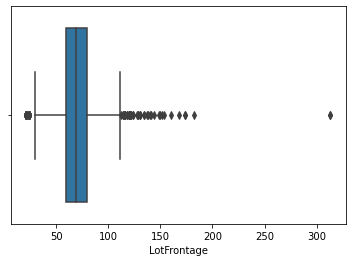

In [31]:
# plotting the box plot visualization
sns.boxplot(housing_dataframe['LotFrontage'])

- From the box plot we can see that there exists one extreme outlier which is far away from the main distribution of the data. Though there exists some mild outliers which are just now above the 1.5 times the IQR value and less than 3.0 times the IQR range. These mild outliers are just the natural continuation of the values. Since there exists some outliers it is better to impute the missing values with the median of the column.

In [32]:
# imputnig the missing values with median
housing_dataframe.loc[housing_dataframe['LotFrontage'].isnull(), 'LotFrontage'] =  housing_dataframe['LotFrontage'].median()

###### Treating missing vlaues in FireplaceQu 

In [33]:
# checking the head of the column
housing_dataframe['FireplaceQu'].head()

0    NaN
1     TA
2     TA
3     Gd
4     TA
Name: FireplaceQu, dtype: object

In [34]:
# checking the value counts of the column
housing_dataframe['FireplaceQu'].value_counts(normalize = True)*100

Gd   49.35065
TA   40.64935
Fa    4.28571
Ex    3.11688
Po    2.59740
Name: FireplaceQu, dtype: float64

- The missin values present in the column corresponds to meaning missing values. The missing values in the column represent that there is no fireplace in the house. Hence it is better to create a new class variable which represents that there doesn't exists any fire place facility in the house.

In [35]:
# creating new class variable to represent no fireplcae facility
housing_dataframe.loc[housing_dataframe['FireplaceQu'].isnull(), 'FireplaceQu'] = 'No_Fireplace'

In [36]:
# checking the value counts after replacing the missing vlaues
housing_dataframe['FireplaceQu'].value_counts(normalize = True)

No_Fireplace   0.47260
Gd             0.26027
TA             0.21438
Fa             0.02260
Ex             0.01644
Po             0.01370
Name: FireplaceQu, dtype: float64

###### Treating missing values in MasVnrType 

In [37]:
# checking the head of the dataframe
housing_dataframe['MasVnrType'].head()

0    BrkFace
1       None
2    BrkFace
3       None
4    BrkFace
Name: MasVnrType, dtype: object

In [38]:
# checking the value counts
housing_dataframe['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

- From above value counts and as per the data the missing values corresponds to meaningful missing values. The missing values corresponds to lots that don't have any Masonry veneer type. Hence it is better to impute the missing values  None.

In [39]:
# imputing missing values with None
housing_dataframe.loc[housing_dataframe['MasVnrType'].isnull(), 'MasVnrType'] = 'None'

###### Treating missing values in MasVnrArea

In [40]:
# checking the head of the column
housing_dataframe['MasVnrArea'].head()

0   196.00000
1     0.00000
2   162.00000
3     0.00000
4   350.00000
Name: MasVnrArea, dtype: float64

- The missing values in the column are similiar to the missing values present in Masonary veneer type. Since there doesn't exists any masonry veneer type the area corresponding to masonry veneer will be equal to Zero. Hence it is better to impute the missing values with Zero.

In [41]:
# imputing the missing values with Zero
housing_dataframe.loc[housing_dataframe['MasVnrArea'].isnull(), 'MasVnrArea'] = 0

##### Treating missing values in Basement related columns 

- In all the columns the missing values correspond to meaningful missing values which means the missing values indicate that there doesn't exists any basement for the lots. Hence in all the columns it is better to impute the missing values with No_Basement.

In [42]:
basement_columns_list = ['BsmtQual', 'BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
for column_name in basement_columns_list:
    housing_dataframe.loc[housing_dataframe[column_name].isnull(), column_name] = 'No_Basement'

###### Treating missing values in Electrical

In [43]:
# checking the head of the column
housing_dataframe['Electrical'].head()

0    SBrkr
1    SBrkr
2    SBrkr
3    SBrkr
4    SBrkr
Name: Electrical, dtype: object

In [44]:
# checking for the value counts
housing_dataframe['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [45]:
# checking for the missing values in the column
housing_dataframe['Electrical'].isnull().sum()

1

- From the above missing values count we can see that there exists only one missing value in the column. Hence it is better to impute with the class label which corresponds to maximum class labels within the column. As per the value counts it is better to impute the missing value with SBrkr.

In [46]:
# imputing the missing values with SBrkr
housing_dataframe.loc[housing_dataframe['Electrical'].isnull(), 'Electrical'] = 'SBrkr'

###### Treating missing values in Garage related columns

- All these columns corresponds to meaningful missing values. The missing values indicate that there is no Garage for the lot and all the missing values can be replaced with No_Garage.

In [47]:
garage_columns_list = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond' ]
for column_name in garage_columns_list:
    housing_dataframe.loc[housing_dataframe[column_name].isnull(), column_name] = 'No_Garage'

###### Treating the missing values for GarageYrBlt

In [48]:
# checking the head of the column
housing_dataframe['GarageYrBlt'].head()

0   2003.00000
1   1976.00000
2   2001.00000
3   1998.00000
4   2000.00000
Name: GarageYrBlt, dtype: float64

- The missing values present in garage year built are similar to that of the missing values in other garage related columns which indicates that there is no garage for the lot. In such case it is better to impute the missing values with Zero.

In [49]:
# imputing the missing values with Zero
housing_dataframe.loc[housing_dataframe['GarageYrBlt'].isnull(), 'GarageYrBlt'] = 0

In [50]:
# checking for the missing value percentage across the columns after imputation
round(100*(housing_dataframe.isnull().sum()/housing_dataframe.shape[0]),2)

MSSubClass      0.00000
MSZoning        0.00000
LotFrontage     0.00000
LotArea         0.00000
Street          0.00000
LotShape        0.00000
LandContour     0.00000
Utilities       0.00000
LotConfig       0.00000
LandSlope       0.00000
Neighborhood    0.00000
Condition1      0.00000
Condition2      0.00000
BldgType        0.00000
HouseStyle      0.00000
OverallQual     0.00000
OverallCond     0.00000
YearBuilt       0.00000
YearRemodAdd    0.00000
RoofStyle       0.00000
RoofMatl        0.00000
Exterior1st     0.00000
Exterior2nd     0.00000
MasVnrType      0.00000
MasVnrArea      0.00000
ExterQual       0.00000
ExterCond       0.00000
Foundation      0.00000
BsmtQual        0.00000
BsmtCond        0.00000
BsmtExposure    0.00000
BsmtFinType1    0.00000
BsmtFinSF1      0.00000
BsmtFinType2    0.00000
BsmtFinSF2      0.00000
BsmtUnfSF       0.00000
TotalBsmtSF     0.00000
Heating         0.00000
HeatingQC       0.00000
CentralAir      0.00000
Electrical      0.00000
1stFlrSF        

- From above percentage values we can see that all the missing values across the columns have been imputed with meaningfull value as the missing values across the columns corresponds to meaningful missing values.

In [51]:
# considering copy of the housing dataframe before dropping highly skewed features
housing_dataframe_copy = housing_dataframe.copy()

In [52]:
# checking the shape
housing_dataframe_copy.shape

(1460, 74)

### Removing Highly Skewed columns

- Skew features are those columns in which one of the class label will be dominant and all other class label will correspond to minimum proportion of the feature such features are called skewed features. Some methods can be used to deal with these skew features like performing feature transformation like log, box-cox transformation etc. But we prefer to drop such highly skewed features as the model will tend to predict the major class label associated with the feature when built model including such skewed feature.

In [53]:
# defining categorical columns list
categorical_columns_list = ['MSSubClass', 'MSZoning','Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond','RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType','ExterQual', 
       'ExterCond', 'Foundation','BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1','BsmtFinType2','Heating', 'HeatingQC',
       'CentralAir', 'Electrical','BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType','GarageFinish', 
       'GarageCars','GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType','SaleCondition']

In [54]:
# checking the value counts in normalized form for each of the categorical variable to identify skew features
for column_name in categorical_columns_list:
    print('Value counts in ' + column_name )
    print(housing_dataframe[column_name].value_counts(normalize = True)*100)
    print('\n')

Value counts in MSSubClass
20    36.71233
60    20.47945
50     9.86301
120    5.95890
30     4.72603
160    4.31507
70     4.10959
80     3.97260
90     3.56164
190    2.05479
85     1.36986
75     1.09589
45     0.82192
180    0.68493
40     0.27397
Name: MSSubClass, dtype: float64


Value counts in MSZoning
RL        78.83562
RM        14.93151
FV         4.45205
RH         1.09589
C (all)    0.68493
Name: MSZoning, dtype: float64


Value counts in Street
Pave   99.58904
Grvl    0.41096
Name: Street, dtype: float64


Value counts in LotShape
Reg   63.35616
IR1   33.15068
IR2    2.80822
IR3    0.68493
Name: LotShape, dtype: float64


Value counts in LandContour
Lvl   89.79452
Bnk    4.31507
HLS    3.42466
Low    2.46575
Name: LandContour, dtype: float64


Value counts in Utilities
AllPub   99.93151
NoSeWa    0.06849
Name: Utilities, dtype: float64


Value counts in LotConfig
Inside    72.05479
Corner    18.01370
CulDSac    6.43836
FR2        3.21918
FR3        0.27397
Name: LotConfig

In [55]:
skewed_columns_list = ['Street','Utilities','LandSlope','Condition2','RoofMatl','Heating','CentralAir','Electrical','BsmtHalfBath',
                      'KitchenAbvGr','Functional','GarageCond','PavedDrive','SaleType','SaleCondition','LandContour','Condition1',
                      'BldgType','RoofStyle','ExterCond','BsmtCond','BsmtFinType2','GarageQual','MSZoning', 'LotConfig']

In [56]:
# dropping highly skewed features from the dataframe
housing_dataframe.drop(skewed_columns_list, axis = 1, inplace = True)

In [57]:
# checking head of the dataframe after dropping skewed features
housing_dataframe.head()

MSSubClass  LotFrontage  LotArea LotShape Neighborhood HouseStyle  \
0          60     65.00000     8450      Reg      CollgCr     2Story   
1          20     80.00000     9600      Reg      Veenker     1Story   
2          60     68.00000    11250      IR1      CollgCr     2Story   
3          70     60.00000     9550      IR1      Crawfor     2Story   
4          60     84.00000    14260      IR1      NoRidge     2Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd Exterior1st Exterior2nd  \
0            7            5       2003          2003     VinylSd     VinylSd   
1            6            8       1976          1976     MetalSd     MetalSd   
2            7            5       2001          2002     VinylSd     VinylSd   
3            7            5       1915          1970     Wd Sdng     Wd Shng   
4            8            5       2000          2000     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual Foundation BsmtQual BsmtExposure  \
0    BrkFace   196.00000        Gd      PConc       Gd           No   
1       None     0.00000        TA     CBlock       Gd           Gd   
2    BrkFace   162.00000        Gd      PConc       Gd           Mn   
3       None     0.00000        TA     BrkTil       TA           No   
4    BrkFace   350.00000        Gd      PConc       Gd           Av   

  BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF HeatingQC  \
0          GLQ         706           0        150          856        Ex   
1          ALQ         978           0        284         1262        Ex   
2          GLQ         486           0        434          920        Ex   
3          ALQ         216           0        540          756        Gd   
4          GLQ         655           0        490         1145        Ex   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  FullBath  \
0       856       854             0       1710             1         2   
1      1262         0             0       1262             0         2   
2       920       866             0       1786             1         2   
3       961       756             0       1717             1         1   
4      1145      1053             0       2198             1         2   

   HalfBath  BedroomAbvGr KitchenQual  TotRmsAbvGrd  Fireplaces   FireplaceQu  \
0         1             3          Gd             8           0  No_Fireplace   
1         0             3          TA             6           1            TA   
2         1             3          Gd             6           1            TA   
3         0             3          Gd             7           1            Gd   
4         1             4          Gd             9           1            TA   

  GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  WoodDeckSF  \
0     Attchd   2003.00000          RFn           2         548           0   
1     Attchd   1976.00000          RFn           2         460         298   
2     Attchd   2001.00000          RFn           2         608           0   
3     Detchd   1998.00000          Unf           3         642           0   
4     Attchd   2000.00000          RFn           3         836         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  YrSold  \
0           61              0          0            0         0    2008   
1            0              0          0            0         0    2007   
2           42              0          0            0         0    2008   
3           35            272          0            0         0    2006   
4           84              0          0            0         0    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

In [58]:
housing_dataframe.shape

(1460, 49)

In [59]:
# creating updated categorical columns list after removing skewed features
categorical_columns_list = ['LotShape','Neighborhood','HouseStyle','Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual','Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
'HeatingQC','KitchenQual','FireplaceQu', 'GarageType','GarageFinish',]

In [60]:
len(categorical_columns_list)

16

### Derived Features

- Converting all the year corresponding features into age representation features. Upon substracting from the current year(2020) we can get the age column representation for the year feature.

In [61]:
# rounding off the decimal places in year columns which have been mapped to int or float data type
for column_name in year_columns_list:
    housing_dataframe[column_name] = housing_dataframe[column_name].apply(lambda x: int('{:.0f}'.format(x)))

In [62]:
# checking year column after rounding off
housing_dataframe[year_columns_list].head()

YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
0       2003          2003         2003    2008
1       1976          1976         1976    2007
2       2001          2002         2001    2008
3       1915          1970         1998    2006
4       2000          2000         2000    2008

In [63]:
# creating age variable for each of year column
for column_name in year_columns_list:
    current_year = 2020
    add_element = 'age_' + column_name
    housing_dataframe[add_element] = housing_dataframe[column_name].apply(lambda x: 2020-x)
    housing_dataframe.drop(column_name, axis= 1, inplace = True)

In [64]:
# checking the columns after addition into dataframe
housing_dataframe.head()

MSSubClass  LotFrontage  LotArea LotShape Neighborhood HouseStyle  \
0          60     65.00000     8450      Reg      CollgCr     2Story   
1          20     80.00000     9600      Reg      Veenker     1Story   
2          60     68.00000    11250      IR1      CollgCr     2Story   
3          70     60.00000     9550      IR1      Crawfor     2Story   
4          60     84.00000    14260      IR1      NoRidge     2Story   

   OverallQual  OverallCond Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
0            7            5     VinylSd     VinylSd    BrkFace   196.00000   
1            6            8     MetalSd     MetalSd       None     0.00000   
2            7            5     VinylSd     VinylSd    BrkFace   162.00000   
3            7            5     Wd Sdng     Wd Shng       None     0.00000   
4            8            5     VinylSd     VinylSd    BrkFace   350.00000   

  ExterQual Foundation BsmtQual BsmtExposure BsmtFinType1  BsmtFinSF1  \
0        Gd      PConc       Gd           No          GLQ         706   
1        TA     CBlock       Gd           Gd          ALQ         978   
2        Gd      PConc       Gd           Mn          GLQ         486   
3        TA     BrkTil       TA           No          ALQ         216   
4        Gd      PConc       Gd           Av          GLQ         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF HeatingQC  1stFlrSF  2ndFlrSF  \
0           0        150          856        Ex       856       854   
1           0        284         1262        Ex      1262         0   
2           0        434          920        Ex       920       866   
3           0        540          756        Gd       961       756   
4           0        490         1145        Ex      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  \
0             0       1710             1         2         1             3   
1             0       1262             0         2         0             3   
2             0       1786             1         2         1             3   
3             0       1717             1         1         0             3   
4             0       2198             1         2         1             4   

  KitchenQual  TotRmsAbvGrd  Fireplaces   FireplaceQu GarageType GarageFinish  \
0          Gd             8           0  No_Fireplace     Attchd          RFn   
1          TA             6           1            TA     Attchd          RFn   
2          Gd             6           1            TA     Attchd          RFn   
3          Gd             7           1            Gd     Detchd          Unf   
4          Gd             9           1            TA     Attchd          RFn   

   GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0           2         548           0           61              0          0   
1           2         460         298            0              0          0   
2           2         608           0           42              0          0   
3           3         642           0           35            272          0   
4           3         836         192           84              0          0   

   ScreenPorch  PoolArea  SalePrice  age_YearBuilt  age_YearRemodAdd  \
0            0         0     208500             17                17   
1            0         0     181500             44                44   
2            0         0     223500             19                18   
3            0         0     140000            105                50   
4            0         0     250000             20                20   

   age_GarageYrBlt  age_YrSold  
0               17          12  
1               44          13  
2               19          12  
3               22          14  
4               20          12

- Previously when treating the missing values in GaragaeYrBlt the missing values where imputed with 0 since there doesn't exists garage from some properties. Upon creating age derived feature for GaragaeYrBlt for the missing value imputed rows we get the same current year. In other to remove misconseption of having a thought that for those properties the garage has been built in the year 2020. It is better to replace such properties having no garages with -1.

In [65]:
# replacing age for the properties having no garages with -1 for better understanding
housing_dataframe.loc[housing_dataframe['age_GarageYrBlt'] == 2020, 'age_GarageYrBlt'] = -1

## Data Preprocessing

- Starting data preprocessing by creating dummy variables. But before creating dummy variables for categorical columns having more class labels within it is better to combine some of the low proportion class labels into one class label for easy dummy variable creation.

In [66]:
# checking the value counts across the categorical variables
for column_name in categorical_columns_list:
    print('value counts in ' + column_name)
    print(housing_dataframe[column_name].value_counts(normalize =  True)*100)
    print('\n')

value counts in LotShape
Reg   63.35616
IR1   33.15068
IR2    2.80822
IR3    0.68493
Name: LotShape, dtype: float64


value counts in Neighborhood
NAmes     15.41096
CollgCr   10.27397
OldTown    7.73973
Edwards    6.84932
Somerst    5.89041
Gilbert    5.41096
NridgHt    5.27397
Sawyer     5.06849
NWAmes     5.00000
SawyerW    4.04110
BrkSide    3.97260
Crawfor    3.49315
Mitchel    3.35616
NoRidge    2.80822
Timber     2.60274
IDOTRR     2.53425
ClearCr    1.91781
StoneBr    1.71233
SWISU      1.71233
MeadowV    1.16438
Blmngtn    1.16438
BrDale     1.09589
Veenker    0.75342
NPkVill    0.61644
Blueste    0.13699
Name: Neighborhood, dtype: float64


value counts in HouseStyle
1Story   49.72603
2Story   30.47945
1.5Fin   10.54795
SLvl      4.45205
SFoyer    2.53425
1.5Unf    0.95890
2.5Unf    0.75342
2.5Fin    0.54795
Name: HouseStyle, dtype: float64


value counts in Exterior1st
VinylSd   35.27397
HdBoard   15.20548
MetalSd   15.06849
Wd Sdng   14.10959
Plywood    7.39726
CemntBd    4

In [67]:
# creating a function to merge all low proportion class labels within each column
# merging the class labels present in Neighborhood less than 5% of total proportion
# merging the class labels which have less than 10% of total proportion
for column_name in categorical_columns_list:
    if column_name  == 'Neighborhood':
        sample_series = 100*(housing_dataframe[column_name].value_counts(normalize = True))
        index_list = list(sample_series[sample_series < 5].index)
        for index_name in index_list:
            housing_dataframe.loc[housing_dataframe[column_name] ==  index_name, column_name] = 'Other_' + column_name
    else:
        sample_series = 100*(housing_dataframe[column_name].value_counts(normalize = True))
        index_list = list(sample_series[sample_series < 10].index)
        for index_name in index_list:
            housing_dataframe.loc[housing_dataframe[column_name] == index_name, column_name] = 'Other_' + column_name

In [68]:
# checking the value counts after combining low proportion class labels
for column_name in categorical_columns_list:
    print('value counts in ' + column_name)
    print(housing_dataframe[column_name].value_counts(normalize =  True)*100)
    print('\n')

value counts in LotShape
Reg              63.35616
IR1              33.15068
Other_LotShape    3.49315
Name: LotShape, dtype: float64


value counts in Neighborhood
Other_Neighborhood   33.08219
NAmes                15.41096
CollgCr              10.27397
OldTown               7.73973
Edwards               6.84932
Somerst               5.89041
Gilbert               5.41096
NridgHt               5.27397
Sawyer                5.06849
NWAmes                5.00000
Name: Neighborhood, dtype: float64


value counts in HouseStyle
1Story             49.72603
2Story             30.47945
1.5Fin             10.54795
Other_HouseStyle    9.24658
Name: HouseStyle, dtype: float64


value counts in Exterior1st
VinylSd             35.27397
Other_Exterior1st   20.34247
HdBoard             15.20548
MetalSd             15.06849
Wd Sdng             14.10959
Name: Exterior1st, dtype: float64


value counts in Exterior2nd
VinylSd             34.52055
Other_Exterior2nd   23.15068
MetalSd             14.65753


### Dummy Variable Creation for Categorical Features

In [69]:
# constructing loop to create dummies into dataframe and drop the original column
for column_name in categorical_columns_list:
    sample_dummies = pd.get_dummies(housing_dataframe[column_name], prefix= column_name)
    drop_element = column_name + '_Other_' + column_name
    sample_dummies.drop(drop_element, axis = 1, inplace = True)
    housing_dataframe = pd.concat([housing_dataframe, sample_dummies], axis = 1)
    housing_dataframe.drop(column_name, axis = 1, inplace = True)

In [70]:
# checking the head of the dataframe after dummification
housing_dataframe.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60     65.00000     8450            7            5   196.00000   
1          20     80.00000     9600            6            8     0.00000   
2          60     68.00000    11250            7            5   162.00000   
3          70     60.00000     9550            7            5     0.00000   
4          60     84.00000    14260            8            5   350.00000   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0         706           0        150          856       856       854   
1         978           0        284         1262      1262         0   
2         486           0        434          920       920       866   
3         216           0        540          756       961       756   
4         655           0        490         1145      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  \
0             0       1710             1         2         1             3   
1             0       1262             0         2         0             3   
2             0       1786             1         2         1             3   
3             0       1717             1         1         0             3   
4             0       2198             1         2         1             4   

   TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0             8           0           2         548           0           61   
1             6           1           2         460         298            0   
2             6           1           2         608           0           42   
3             7           1           3         642           0           35   
4             9           1           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  SalePrice  age_YearBuilt  \
0              0          0            0         0     208500             17   
1              0          0            0         0     181500             44   
2              0          0            0         0     223500             19   
3            272          0            0         0     140000            105   
4              0          0            0         0     250000             20   

   age_YearRemodAdd  age_GarageYrBlt  age_YrSold  LotShape_IR1  LotShape_Reg  \
0                17               17          12             0             1   
1                44               44          13             0             1   
2                18               19          12             1             0   
3                50               22          14             1             0   
4                20               20          12             1             0   

   Neighborhood_CollgCr  Neighborhood_Edwards  Neighborhood_Gilbert  \
0                     1                     0                     0   
1                     0                     0                     0   
2                     1                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_NAmes  Neighborhood_NWAmes  Neighborhood_NridgHt  \
0                   0                    0                     0   
1                   0                    0                     0   
2                   0                    0                     0   
3                   0                    0                     0   
4                   0                    0                     0   

   Neighborhood_OldTown  Neighborhood_Sawyer  Neighborhood_Somerst  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4  

In [71]:
# checking the shape of the dataframe
housing_dataframe.shape

(1460, 83)

### Target variable modification

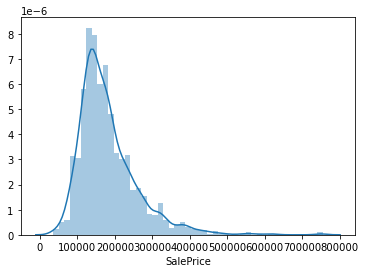

In [72]:
# checking the distribution of target variable
sns.distplot(housing_dataframe['SalePrice'])
plt.show()

- Visually from the above distribution we can see that the distribution is skewed to the right side. It is necessary to make some transformation on the target variable so that the distribution is normally distributed. Before that let's statistically check whether the distribution is normally distributed or not using Shapiro wilk test.

In [73]:
# performing shapiro test
stat, p_value = shapiro(housing_dataframe['SalePrice'])
print('The test statistic associate with the test: {}'.format(stat))
print('The p value associated with the test: {}'.format(p_value))
if p_value >= 0.05:
    print('Data is normally distributed')
else:
    print('Data is not normally distributed i.e. Skewed')

The test statistic associate with the test: 0.869671642780304
The p value associated with the test: 3.206247534576162e-33
Data is not normally distributed i.e. Skewed


- From the above test results we can see that the data is not normally distributed i.e. Skewed. It is better to perform some transformations on the data in order to make into normal distribution like square root, resiprocal or log. Let's few possible transformations and then decide based on the distribution obtained after transformation.

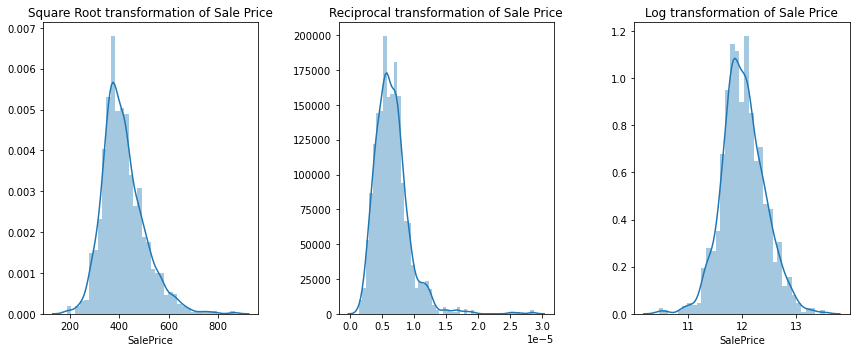

In [74]:
# checking different transformations
plt.figure(figsize= (12,5))
plt.subplot(1,3,1)
# square root transformation
target_trans1 = np.sqrt(housing_dataframe['SalePrice'])
sns.distplot(target_trans1)
plt.title('Square Root transformation of Sale Price')
plt.subplot(1,3,2)
# reciprocal transformation
target_trans2 = 1/np.array(housing_dataframe['SalePrice'])
sns.distplot(target_trans2)
plt.title('Reciprocal transformation of Sale Price')
plt.subplot(1,3,3)
# log transformation
target_trans3 = np.log(housing_dataframe['SalePrice'])
sns.distplot(target_trans3)
plt.title('Log transformation of Sale Price')
plt.tight_layout()
plt.show()

- From above plots we can see that among all transformation it is better to preform log transformation

In [75]:
# performing Log transformation on target variable
housing_dataframe['SalePrice'] = np.log(housing_dataframe['SalePrice'])

In [76]:
# checking the head of the dataframe after modification of target variable
housing_dataframe.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60     65.00000     8450            7            5   196.00000   
1          20     80.00000     9600            6            8     0.00000   
2          60     68.00000    11250            7            5   162.00000   
3          70     60.00000     9550            7            5     0.00000   
4          60     84.00000    14260            8            5   350.00000   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0         706           0        150          856       856       854   
1         978           0        284         1262      1262         0   
2         486           0        434          920       920       866   
3         216           0        540          756       961       756   
4         655           0        490         1145      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  \
0             0       1710             1         2         1             3   
1             0       1262             0         2         0             3   
2             0       1786             1         2         1             3   
3             0       1717             1         1         0             3   
4             0       2198             1         2         1             4   

   TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0             8           0           2         548           0           61   
1             6           1           2         460         298            0   
2             6           1           2         608           0           42   
3             7           1           3         642           0           35   
4             9           1           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  SalePrice  age_YearBuilt  \
0              0          0            0         0   12.24769             17   
1              0          0            0         0   12.10901             44   
2              0          0            0         0   12.31717             19   
3            272          0            0         0   11.84940            105   
4              0          0            0         0   12.42922             20   

   age_YearRemodAdd  age_GarageYrBlt  age_YrSold  LotShape_IR1  LotShape_Reg  \
0                17               17          12             0             1   
1                44               44          13             0             1   
2                18               19          12             1             0   
3                50               22          14             1             0   
4                20               20          12             1             0   

   Neighborhood_CollgCr  Neighborhood_Edwards  Neighborhood_Gilbert  \
0                     1                     0                     0   
1                     0                     0                     0   
2                     1                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_NAmes  Neighborhood_NWAmes  Neighborhood_NridgHt  \
0                   0                    0                     0   
1                   0                    0                     0   
2                   0                    0                     0   
3                   0                    0                     0   
4                   0                    0                     0   

   Neighborhood_OldTown  Neighborhood_Sawyer  Neighborhood_Somerst  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4  

### Checking for Correlations between the features

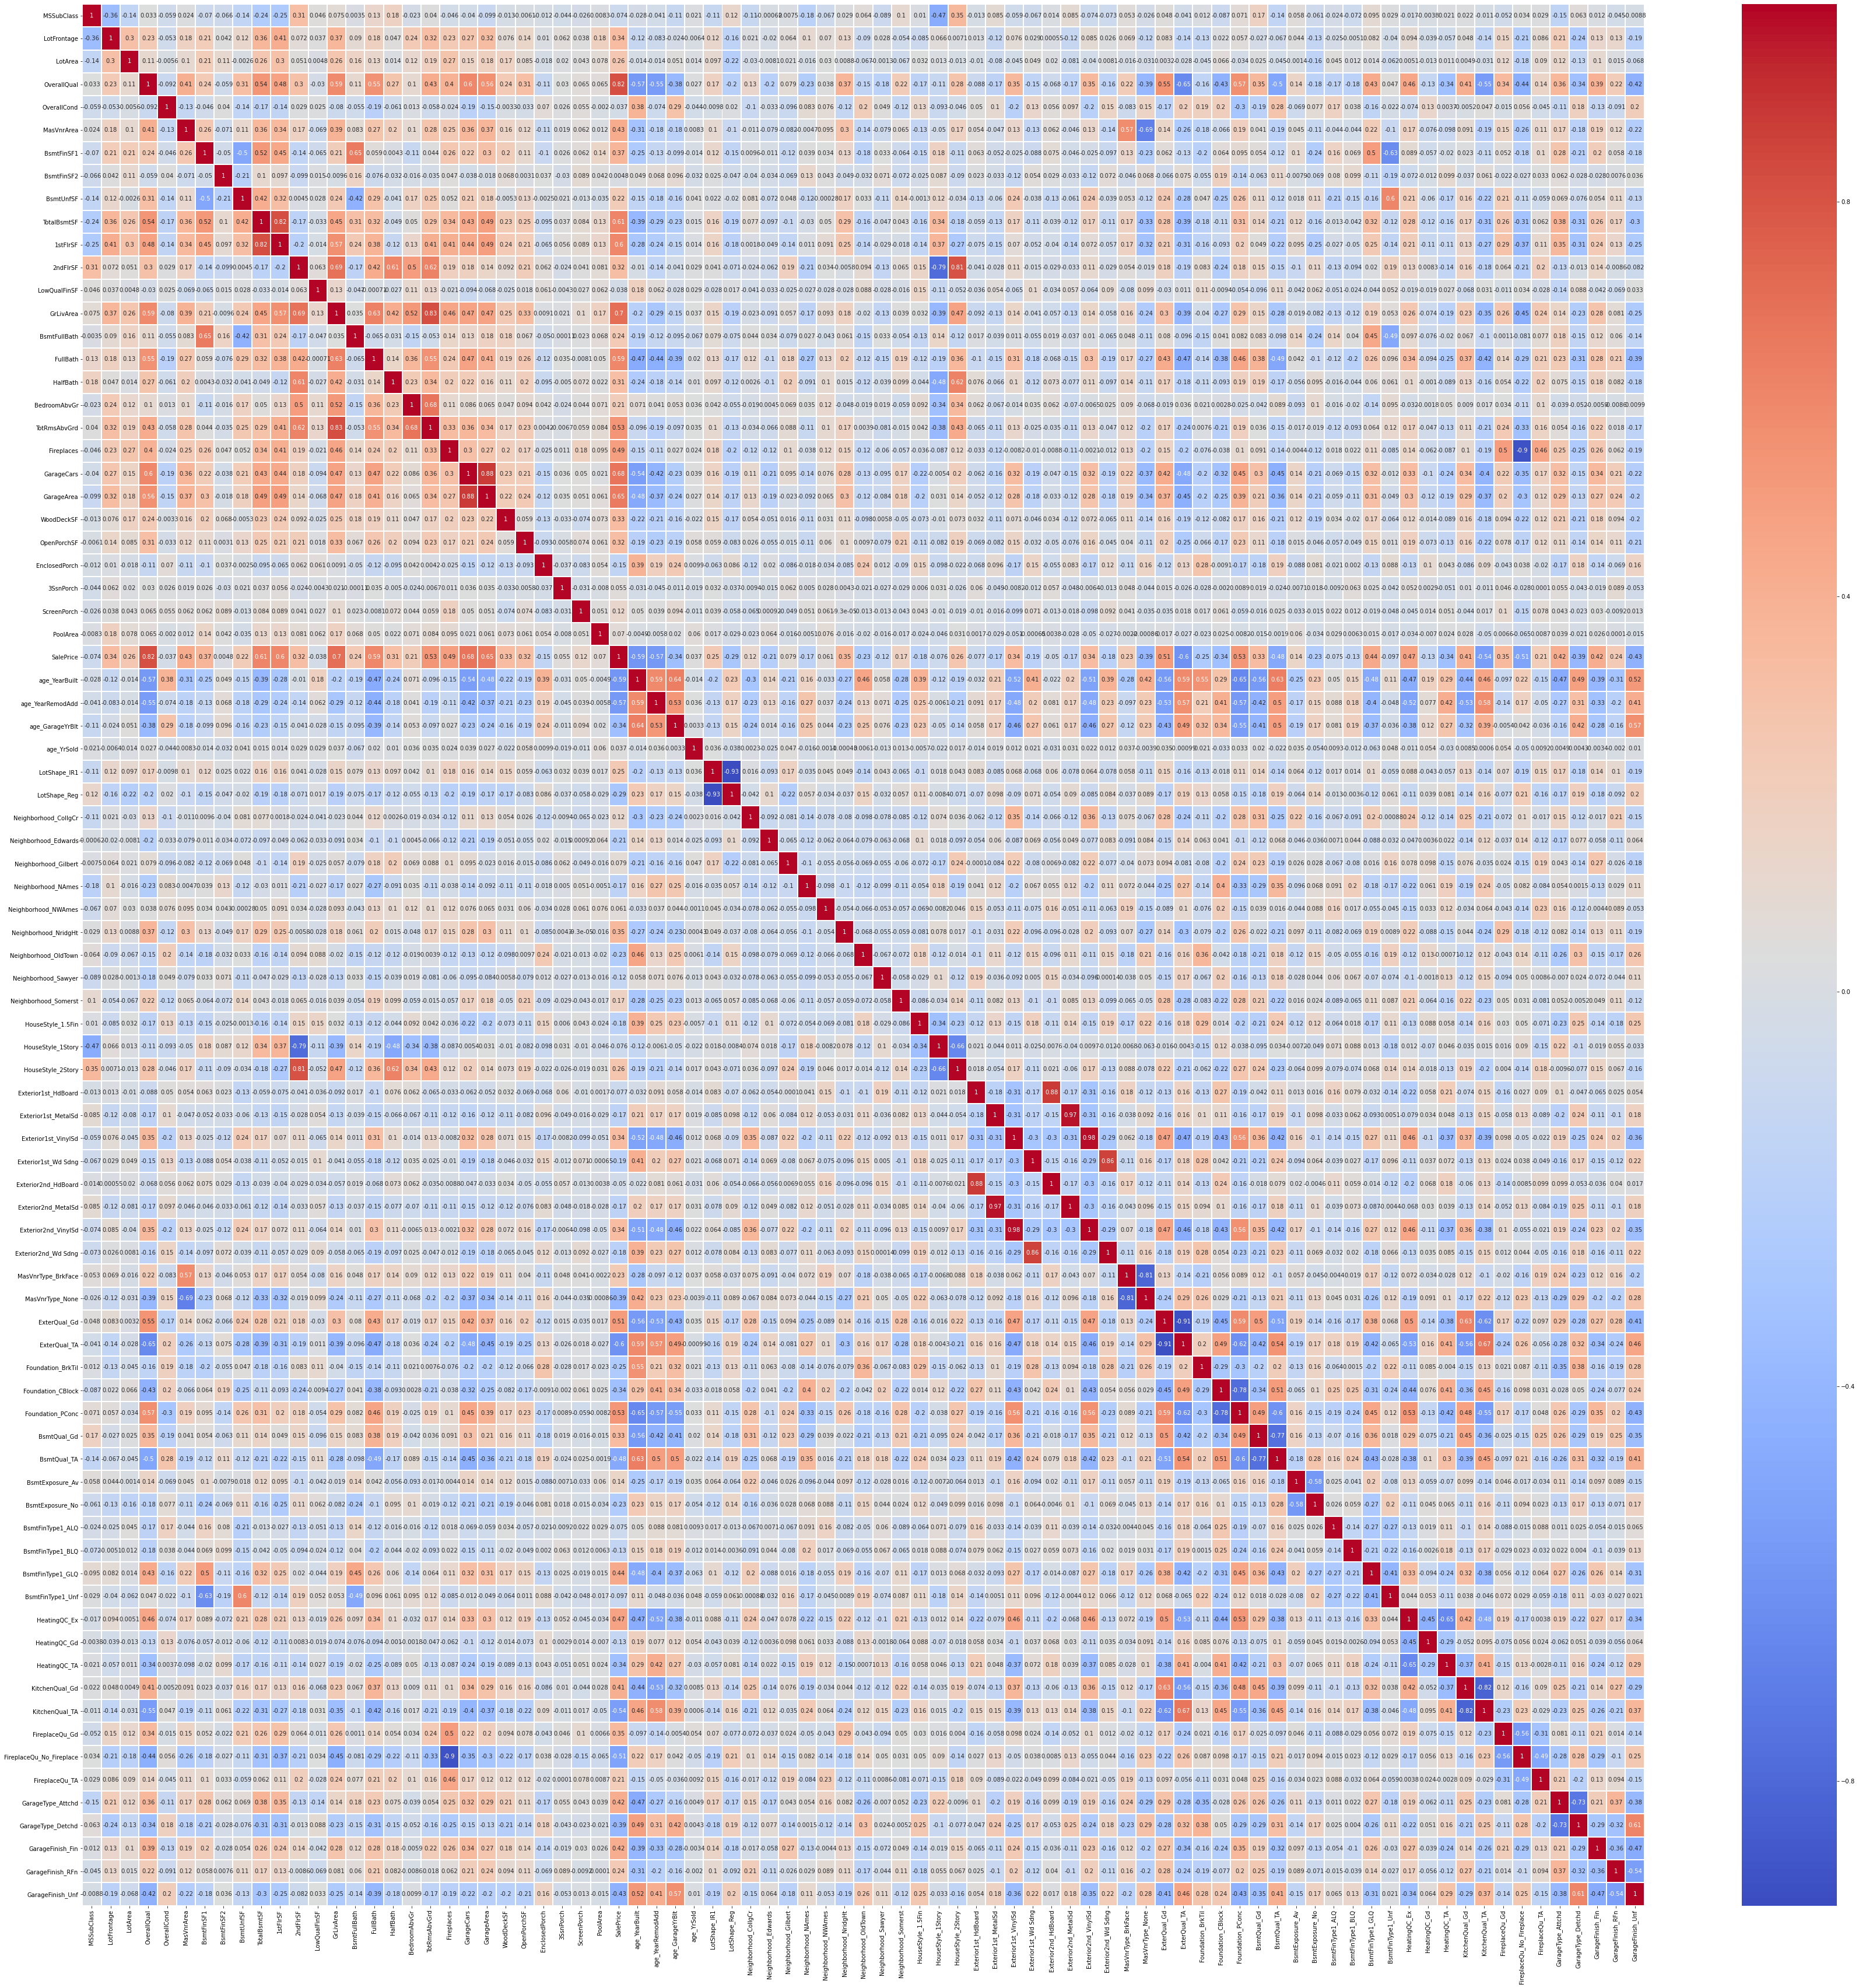

In [77]:
plt.figure(figsize= (60,60))
corr_table = housing_dataframe.corr()
sns.heatmap(corr_table, annot= True, cmap= 'coolwarm', linecolor= 'white', linewidths= 1)
plt.show()

- From above plot we can see there exists some strong correlations between features which are to be removed if performing plain linear regression as coefficients will be widely affected upon having multicollinaeity between features. But since we are performing regularized regression Ridge and Lasso we no need to deal specifically for the multicollinearity issues.

### Splitting the data into Train and Test

In [78]:
df_train, df_test = train_test_split(housing_dataframe, train_size = 0.80, test_size = 0.20, random_state = 100)

In [79]:
# checking the shapes of train and test
print(df_train.shape, df_test.shape)

(1168, 83) (292, 83)


In [80]:
# defining updated numerical columns
numerical_columns_list = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr','Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 
       'SalePrice','age_YearBuilt', 'age_YearRemodAdd', 'age_GarageYrBlt', 'age_YrSold', '1stFlrSF', 'TotRmsAbvGrd']

In [81]:
# Scaling df_train and df_test
scaler = StandardScaler()
df_train[numerical_columns_list] = scaler.fit_transform(df_train[numerical_columns_list])
df_test[numerical_columns_list] = scaler.transform(df_test[numerical_columns_list])

In [82]:
# checking df_train after scaling
df_train.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
133     -0.87855     -0.03522 -0.36827      1.37690     -0.52001     0.17735   
290      0.06157      2.31444  0.52209      1.37690     -0.52001    -0.56358   
24      -0.87855     -0.03522 -0.22665     -0.79539      2.19553    -0.56358   
1093    -0.87855      0.05692 -0.12662     -0.79539      2.19553     0.34079   
1288     1.47176     -1.37131 -0.48914      1.37690     -0.52001    -0.56358   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
133      1.19463    -0.29035   -0.67376      0.45375   0.32247  -0.79320   
290     -0.97374    -0.29035    1.15821      0.03703  -0.22749   1.13123   
24      -0.56811     3.70813   -0.80382     -0.00508  -0.27564  -0.79320   
1093     0.45242    -0.29035   -0.80606     -0.43953   0.07917  -0.79320   
1288     1.52474    -0.29035   -0.49213      0.97243   1.24245  -0.79320   

      LowQualFinSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  \
133       -0.12545   -0.42856       1.07898   0.79192  -0.75430      -1.06788   
290       -0.12545    0.75802      -0.83921   0.79192   1.25259       0.16340   
24        -0.12545   -0.87805       1.07898  -1.03246  -0.75430       0.16340   
1093      -0.12545   -0.61140       1.07898  -1.03246   1.25259      -2.29915   
1288      -0.12545    0.26282       1.07898   0.79192  -0.75430      -1.06788   

      TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
133       -0.33254    -0.95025     0.30189    -0.01540     0.77214   
290        0.92443     0.61518     0.30189     0.98391    -0.75125   
24        -0.33254     0.61518    -1.03883    -0.95401     2.47009   
1093      -0.33254    -0.95025     0.30189     1.91318    -0.75125   
1288      -0.96102     0.61518     0.30189     0.11535     0.93083   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  SalePrice  \
133      -0.32742       -0.37712   -0.11689     -0.26464  -0.05824    0.70319   
290       0.07379       -0.37712   -0.11689     -0.26464  -0.05824    0.85092   
24        0.67560       -0.37712   -0.11689     -0.26464  -0.05824   -0.19907   
1093      0.27439       -0.37712   -0.11689     -0.26464  -0.05824   -0.33401   
1288      0.19723       -0.37712   -0.11689     -0.26464  -0.05824    1.29511   

      age_YearBuilt  age_YearRemodAdd  age_GarageYrBlt  age_YrSold  \
133        -0.98708          -0.82719         -0.77642    -0.89696   
290        -1.15061          -1.02065         -0.96888     1.35606   
24          0.09218          -0.77882          0.49380    -1.64797   
1093        0.19029          -0.63373          0.14737     1.35606   
1288       -0.95438          -0.73046         -0.73793    -0.89696   

      LotShape_IR1  LotShape_Reg  Neighborhood_CollgCr  Neighborhood_Edwards  \
133              1             0                     0                     0   
290              0             1                     1                     0   
24               1             0                     0                     0   
1093             0             1                     0                     0   
1288             1             0                     0                     0   

      Neighborhood_Gilbert  Neighborhood_NAmes  Neighborhood_NWAmes  \
133                      0                   0                    0   
290                      0                   0                    0   
24                       0                   0                    0   
1093                     0                   1                    0   
1288                     0                   0                    0   

      Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_Sawyer  \
133                      0                     0                    0   
290                      0                     0                    0   
24                       0                     0                    1   
1093                     0                     0    

In [83]:
# checking df_test after scaling
df_test.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
1436    -0.87855     -0.44987 -0.15000     -1.51948      0.38517    -0.56358   
57       0.06157      0.88621  0.11890      0.65280     -0.52001    -0.56358   
780     -0.87855     -0.31166 -0.26437      0.65280     -0.52001    -0.35656   
382      0.06157      0.42549 -0.12509      0.65280     -0.52001    -0.56358   
1170     0.53164      0.28728 -0.06054     -0.07129      0.38517    -0.56358   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
1436     0.35533    -0.29035   -0.70515     -0.43953  -0.77238  -0.79320   
57      -0.97374    -0.29035    0.66715     -0.44840  -0.78251   1.17705   
780     -0.97374    -0.29035    1.51250      0.38725   0.21349  -0.79320   
382     -0.97374    -0.29035    0.84429     -0.27329  -0.58230   1.17246   
1170     0.15252    -0.29035    0.02584      0.07471  -0.12865  -0.79320   

      LowQualFinSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  \
1436      -0.12545   -1.25136      -0.83921  -1.03246  -0.75430       0.16340   
57        -0.12545    0.37900      -0.83921   0.79192   1.25259       0.16340   
780       -0.12545   -0.51046      -0.83921   0.79192  -0.75430       0.16340   
382       -0.12545    0.52565      -0.83921   0.79192   1.25259       0.16340   
1170      -0.12545   -0.76758       1.07898  -1.03246  -0.75430       0.16340   

      TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  \
1436      -0.96102    -0.95025     0.30189     0.25077    -0.75125   
57         0.29595    -0.95025     0.30189     0.42355    -0.75125   
780       -0.33254     0.61518     0.30189    -0.33761     0.99430   
382        0.92443    -0.95025     0.30189     0.76911     0.39129   
1170      -0.33254     0.61518    -1.03883    -0.54307     0.85942   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  SalePrice  \
1436     -0.71320       -0.37712   -0.11689     -0.26464  -0.05824   -0.81959   
57        0.36698       -0.37712   -0.11689     -0.26464  -0.05824    0.41743   
780      -0.38914       -0.37712   -0.11689     -0.26464  -0.05824    0.13872   
382       0.10465       -0.37712   -0.11689     -0.26464  -0.05824    0.62733   
1170     -0.71320       -0.37712   -0.11689     -0.26464  17.79081    0.06581   

      age_YearBuilt  age_YearRemodAdd  age_GarageYrBlt  age_YrSold  \
1436       -0.00594           0.67215          0.26285     0.60505   
57         -1.08520          -0.92392         -0.89189     1.35606   
780        -0.79085          -0.53699         -0.54547     0.60505   
382        -1.15061          -1.02065         -0.96888     0.60505   
1170       -0.20217           0.38196          0.14737    -0.14596   

      LotShape_IR1  LotShape_Reg  Neighborhood_CollgCr  Neighborhood_Edwards  \
1436             0             1                     0                     0   
57               1             0                     1                     0   
780              0             1                     0                     0   
382              1             0                     1                     0   
1170             0             1                     0                     0   

      Neighborhood_Gilbert  Neighborhood_NAmes  Neighborhood_NWAmes  \
1436                     0                   1                    0   
57                       0                   0                    0   
780                      1                   0                    0   
382                      0                   0                    0   
1170                     0                   0                    0   

      Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_Sawyer  \
1436                     0                     0                    0   
57                       0                     0                    0   
780                      0                     0                    0   
382                      0                     0    

In [84]:
# creating X and y variables from train and test dataframes
X_train = df_train.drop('SalePrice', axis =1)
y_train = df_train['SalePrice']
X_test = df_test.drop('SalePrice', axis = 1)
y_test = df_test['SalePrice']

## Model Building

- Since there are many features in the data set before performing Ridge and Lasso Regression it is better to perform model based feature selection using RFE and then proceed further using regularized regression methods.

##### Using RFE and selecting n_features_to_select by hyper parameter tuning

In [85]:
# defining Linear Regression model object
lm_model = LinearRegression()

# fittting the data on top of the linear model object
lm_model.fit(X_train, y_train)

# defining RFE model object
rfe_model = RFE(lm_model)

# defining params for passing as input into grid_model object
params = [{'n_features_to_select': [10,15,20,25,30,35,40,45,50]}]

# defining cross validation scheme
folds = KFold(n_splits= 5, shuffle= True, random_state= 100)

# defining grid_model object
grid_model = GridSearchCV(rfe_model, param_grid= params, n_jobs= -1, verbose = True, scoring = 'r2', cv= folds, return_train_score= True)

# fitting the grid model on top of the data
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   14.0s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score=nan,
             estimator=RFE(estimator=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           n_features_to_select=None, step=1, verbose=0),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'n_features_to_select': [10, 15, 20, 25, 30, 35, 40,
                                                   45, 50]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=True)

In [86]:
# defining the results of the grid search in a dataframe
grid_results_dataframe = pd.DataFrame(grid_model.cv_results_)
# checking the head of the dataframe
grid_results_dataframe.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.48809       0.02613          0.00319         0.00040   
1        0.45897       0.01259          0.00339         0.00049   
2        0.44461       0.01750          0.00319         0.00040   
3        0.44501       0.01233          0.00379         0.00040   
4        0.42048       0.01579          0.00359         0.00049   

  param_n_features_to_select                        params  split0_test_score  \
0                         10  {'n_features_to_select': 10}            0.81584   
1                         15  {'n_features_to_select': 15}            0.85467   
2                         20  {'n_features_to_select': 20}            0.86094   
3                         25  {'n_features_to_select': 25}            0.87216   
4                         30  {'n_features_to_select': 30}            0.87050   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0            0.66913            0.78687            0.82719            0.82105   
1            0.70255            0.69739            0.86133            0.87097   
2            0.70890            0.72077            0.87286            0.87848   
3            0.72181            0.68413            0.87451            0.87732   
4            0.71224            0.68429            0.87957            0.88903   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0          0.78401         0.05909                9             0.78322   
1          0.79738         0.07972                8             0.82519   
2          0.80839         0.07669                5             0.84102   
3          0.80599         0.08497                7             0.85585   
4          0.80713         0.08951                6             0.85874   

   split1_train_score  split2_train_score  split3_train_score  \
0             0.85550             0.80987             0.80009   
1             0.87255             0.84962             0.83284   
2             0.88933             0.86505             0.84892   
3             0.89405             0.87794             0.85090   
4             0.89808             0.88112             0.85729   

   split4_train_score  mean_train_score  std_train_score  
0             0.80090           0.80992          0.02437  
1             0.83855           0.84375          0.01646  
2             0.84537           0.85794          0.01767  
3             0.85042           0.86583          0.01734  
4             0.86051           0.87115          0.01602

- Rather than checking the dataframe it is better to plot the validation curves and decide the best hyperparameter value.

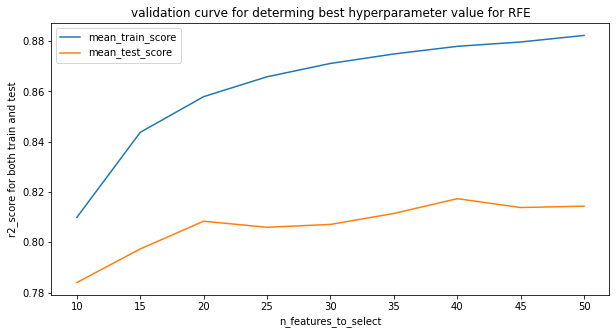

In [87]:
# plotting the validation curve
plt.figure(figsize= (10,5))
plt.plot(grid_results_dataframe['param_n_features_to_select'], grid_results_dataframe['mean_train_score'], label = 'mean_train_score')
plt.plot(grid_results_dataframe['param_n_features_to_select'], grid_results_dataframe['mean_test_score'], label = 'mean_test_score')
plt.legend(loc = 0)
plt.xlabel('n_features_to_select')
plt.ylabel('r2_score for both train and test')
plt.title('validation curve for determing best hyperparameter value for RFE')
plt.show()

- From above validation curve plot we can see that both train and test scores are gradually increasing. At the same time the seperation between train and test is also considerably increasing which is an indication of having overfitting issue. Since we are performing RFE feature selection, just as a initial screen test for feature selection it is better to consider hyperparameter value which has high test score as later we will be performing regularization in order to reduce the complexity of the model. Hence it is better to select n_features_to_select = 40 <br><br>
- We start by considering 40 features and perfrom Ridge and Lasso regression.

In [88]:
# performing rfe using n_features_to_select = 40
rfe_model_tune = RFE(lm_model, n_features_to_select= 40)
# fitting the data on top of the rfe model object
rfe_model_tune.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=40, step=1, verbose=0)

In [89]:
# checking top 40 features
list(zip(X_train.columns, rfe_model_tune.support_ , rfe_model_tune.ranking_))

[('MSSubClass', True, 1),
 ('LotFrontage', False, 33),
 ('LotArea', False, 6),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 43),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('FullBath', False, 17),
 ('HalfBath', False, 19),
 ('BedroomAbvGr', False, 35),
 ('TotRmsAbvGrd', False, 21),
 ('Fireplaces', False, 38),
 ('GarageCars', True, 1),
 ('GarageArea', False, 39),
 ('WoodDeckSF', False, 27),
 ('OpenPorchSF', False, 31),
 ('EnclosedPorch', False, 26),
 ('3SsnPorch', False, 29),
 ('ScreenPorch', False, 25),
 ('PoolArea', False, 2),
 ('age_YearBuilt', True, 1),
 ('age_YearRemodAdd', False, 7),
 ('age_GarageYrBlt', False, 34),
 ('age_YrSold', False, 30),
 ('LotShape_IR1', True, 1),
 ('LotShape_Reg', False, 32),
 ('Neighborhood_CollgCr', False, 42),
 ('Neighborhood_Edwards'

In [90]:
# rfe determined columns
rfe_columns = list(X_train.columns[rfe_model_tune.support_])
rfe_columns

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'GarageCars',
 'age_YearBuilt',
 'LotShape_IR1',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_NWAmes',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_Sawyer',
 'Neighborhood_Somerst',
 'HouseStyle_2Story',
 'Exterior1st_VinylSd',
 'Exterior2nd_VinylSd',
 'ExterQual_Gd',
 'ExterQual_TA',
 'Foundation_BrkTil',
 'Foundation_CBlock',
 'Foundation_PConc',
 'BsmtQual_Gd',
 'BsmtQual_TA',
 'BsmtFinType1_ALQ',
 'BsmtFinType1_BLQ',
 'BsmtFinType1_GLQ',
 'HeatingQC_TA',
 'KitchenQual_Gd',
 'KitchenQual_TA',
 'FireplaceQu_No_Fireplace',
 'GarageType_Attchd']

In [91]:
# modifying X_train and X_test based on rfe determined columns
X_train = X_train[rfe_columns]
X_test = X_test[rfe_columns]

In [92]:
# checking shapes after considering rfe determined columns
X_train.shape, X_test.shape

((1168, 40), (292, 40))

- Let's move forward to perform Ridge and Lasso Regression along with hyperparameter tuning.

## Ridge Regression

In [93]:
# performing ridge regression along with hyperparameter tuning of regularization parameter (lambda or alpha)

# defining params for passing into Gridsearchcv
params = [{'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}]

# defining cross validation scheme
folds = KFold(n_splits= 5, shuffle= True, random_state= 100)

# defining ridge model object
ridge_model = Ridge(random_state = 100)

# defining grid search model object
grid_ridge_model = GridSearchCV(ridge_model, param_grid= params, n_jobs= -1, 
                                verbose = True, scoring= 'neg_mean_absolute_error', cv= folds, return_train_score= True)
# fitting grid model object on top of the data
grid_ridge_model.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    0.4s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=100,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                    0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                    100, 500, 1000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=True)

In [94]:
# analyzing the results of the grid search in a dataframe
grid_ridge_results_dataframe = pd.DataFrame(grid_ridge_model.cv_results_)
# checking the head of the results dataframe
grid_ridge_results_dataframe.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.00459       0.00102          0.00159         0.00050     0.00010   
1        0.00419       0.00040          0.00160         0.00049     0.00100   
2        0.00378       0.00040          0.00140         0.00049     0.01000   
3        0.00539       0.00049          0.00199         0.00000     0.05000   
4        0.00439       0.00120          0.00199         0.00000     0.10000   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}           -0.25701           -0.27009           -0.25437   
1   {'alpha': 0.001}           -0.25701           -0.27009           -0.25437   
2    {'alpha': 0.01}           -0.25700           -0.27009           -0.25436   
3    {'alpha': 0.05}           -0.25694           -0.27008           -0.25433   
4     {'alpha': 0.1}           -0.25687           -0.27008           -0.25429   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           -0.22995           -0.24685         -0.25165         0.01319   
1           -0.22995           -0.24685         -0.25165         0.01319   
2           -0.22995           -0.24684         -0.25165         0.01319   
3           -0.22995           -0.24682         -0.25162         0.01318   
4           -0.22995           -0.24679         -0.25160         0.01318   

   rank_test_score  split0_train_score  split1_train_score  \
0               26            -0.24467            -0.21826   
1               25            -0.24467            -0.21826   
2               24            -0.24466            -0.21825   
3               23            -0.24464            -0.21825   
4               22            -0.24461            -0.21825   

   split2_train_score  split3_train_score  split4_train_score  \
0            -0.23776            -0.25044            -0.24789   
1            -0.23776            -0.25044            -0.24789   
2            -0.23776            -0.25043            -0.24788   
3            -0.23775            -0.25042            -0.24787   
4            -0.23775            -0.25040            -0.24786   

   mean_train_score  std_train_score  
0          -0.23980          0.01158  
1          -0.23980          0.01158  
2          -0.23980          0.01158  
3          -0.23979          0.01157  
4          -0.23977          0.01157

- Rather than analyzing for the best hyperparameter it is better to plot validation curve to decide the best hyperparameter.

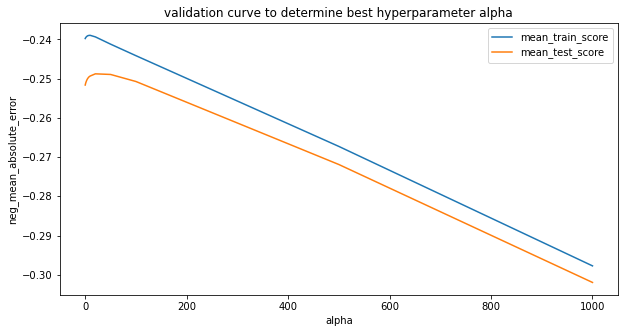

In [95]:
# plotting validation curve
plt.figure(figsize= (10,5))
plt.plot(grid_ridge_results_dataframe['param_alpha'], grid_ridge_results_dataframe['mean_train_score'], label = 'mean_train_score')
plt.plot(grid_ridge_results_dataframe['param_alpha'], grid_ridge_results_dataframe['mean_test_score'], label = 'mean_test_score')
plt.legend(loc = 0)
plt.xlabel('alpha')
plt.ylabel('neg_mean_absolute_error')
plt.title('validation curve to determine best hyperparameter alpha')
plt.show()

- Since we have considered negative mean absolute error as the scoring metric for performing grid search cv we need to have higher negative mean abolute error. From above we can see that initially train and test neg mean abdolute error is high and then gradually decreases. The best alpha range somewhere lies in between 0 and 200. Hence it is better to further reduce the range of alpha values which has been given as input for perform grid search cross validation.

In [96]:
# reducing the range of alpha and performing hyperparameter tuning again using grid search cv

# defining params for passing into Gridsearchcv
params = [{'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 
 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 
 25.0 , 30.0, 40.0, 50.0, 60.0, 70.0, 
 80.0, 90.0, 100, 120, 140, 160, 180, 200]}]

# defining cross validation scheme
folds = KFold(n_splits= 5, shuffle= True, random_state= 100)

# defining ridge model object
ridge_model = Ridge(random_state= 100)

# defining grid search model object
grid_ridge_model = GridSearchCV(ridge_model, param_grid= params, n_jobs= -1, 
                                verbose = True, scoring= 'neg_mean_absolute_error', cv= folds, return_train_score= True)
# fitting grid model object on top of the data
grid_ridge_model.fit(X_train, y_train)

Fitting 5 folds for each of 51 candidates, totalling 255 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 255 out of 255 | elapsed:    0.7s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=100,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                    0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0,
                                    12.0, 13.0, 14.0, 15.0, 16.0, 17.0, ...]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=True)

In [97]:
# checking the results of grid search cv in dataframe
grid_ridge_results_dataframe_1 = pd.DataFrame(grid_ridge_model.cv_results_)
# checking the head of the dataframe
grid_ridge_results_dataframe_1.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.00519       0.00040          0.00180         0.00040     0.00010   
1        0.00539       0.00049          0.00219         0.00040     0.00100   
2        0.00618       0.00040          0.00240         0.00049     0.01000   
3        0.00559       0.00049          0.00219         0.00040     0.05000   
4        0.00559       0.00049          0.00160         0.00049     0.10000   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}           -0.25701           -0.27009           -0.25437   
1   {'alpha': 0.001}           -0.25701           -0.27009           -0.25437   
2    {'alpha': 0.01}           -0.25700           -0.27009           -0.25436   
3    {'alpha': 0.05}           -0.25694           -0.27008           -0.25433   
4     {'alpha': 0.1}           -0.25687           -0.27008           -0.25429   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           -0.22995           -0.24685         -0.25165         0.01319   
1           -0.22995           -0.24685         -0.25165         0.01319   
2           -0.22995           -0.24684         -0.25165         0.01319   
3           -0.22995           -0.24682         -0.25162         0.01318   
4           -0.22995           -0.24679         -0.25160         0.01318   

   rank_test_score  split0_train_score  split1_train_score  \
0               47            -0.24467            -0.21826   
1               46            -0.24467            -0.21826   
2               45            -0.24466            -0.21825   
3               44            -0.24464            -0.21825   
4               43            -0.24461            -0.21825   

   split2_train_score  split3_train_score  split4_train_score  \
0            -0.23776            -0.25044            -0.24789   
1            -0.23776            -0.25044            -0.24789   
2            -0.23776            -0.25043            -0.24788   
3            -0.23775            -0.25042            -0.24787   
4            -0.23775            -0.25040            -0.24786   

   mean_train_score  std_train_score  
0          -0.23980          0.01158  
1          -0.23980          0.01158  
2          -0.23980          0.01158  
3          -0.23979          0.01157  
4          -0.23977          0.01157

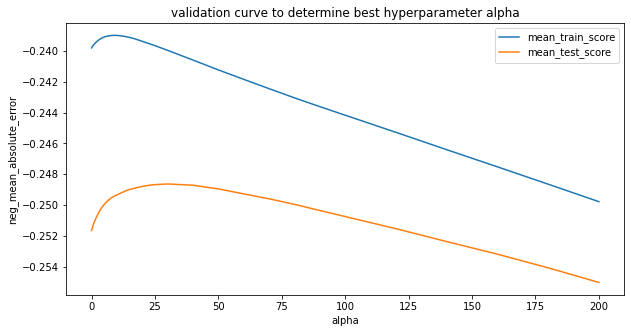

In [98]:
# plotting validation curve
plt.figure(figsize= (10,5))
plt.plot(grid_ridge_results_dataframe_1['param_alpha'], grid_ridge_results_dataframe_1['mean_train_score'], label = 'mean_train_score')
plt.plot(grid_ridge_results_dataframe_1['param_alpha'], grid_ridge_results_dataframe_1['mean_test_score'], label = 'mean_test_score')
plt.legend(loc = 0)
plt.xlabel('alpha')
plt.ylabel('neg_mean_absolute_error')
plt.title('validation curve to determine best hyperparameter alpha')
plt.show()

- The hyperparameter selection from validation curve happens between a tradeoff of having low difference between train and test score or considering hyperparameter value where test and train are considerably high. Here considering a value which is higher as well as slightly closer to train score. From above plot we can see that mean negative absolute score is higher around 25~30 for test score and 20~25 for train score. Before selecting for the optimum hyperparameter value let's consider best estimator value resulted by grid search.

In [99]:
# checking for the best estimator resulted by grid_ridge_model
grid_ridge_model.best_estimator_

Ridge(alpha=30.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=100, solver='auto', tol=0.001)

- From above we can see that grid search has resulted with 30 as the best hyperparameter value and from above validation cuvre analysis we get a range of 20~30 for hyperparameter. Let's consider 25 as the hyperparameter value.

In [100]:
# Building Ridge model after hyperparameter tuning of alpha value

# defining Ridge model object
ridge_model_tune = Ridge(alpha= 25, random_state= 100)

# fitting the model on top of the data
ridge_model_tune.fit(X_train, y_train)

Ridge(alpha=25, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=100, solver='auto', tol=0.001)

In [101]:
# making predictions on train set using ridge model
y_train_pred_ridge = ridge_model_tune.predict(X_train)

# making predictions on test dataset using ridge model
y_test_pred_ridge = ridge_model_tune.predict(X_test)

In [102]:
# checking r2_score obtained using the model on train and test sets
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)
print('The r2_score on train set: {}'.format(r2_train_ridge))
print('The r2_score on test set: {}'.format(r2_test_ridge))

The r2_score on train set: 0.8669731112654685
The r2_score on test set: 0.8762814704233344


- From above we can see that test r2_score is higher than train score which is an indication that model is generalized.

In [103]:
# checking for the coefficients of ridge
ridge_coeff = ridge_model_tune.coef_
ridge_coeff

array([-0.07234215,  0.2333639 ,  0.14980111,  0.01993294,  0.02497939,
        0.0149826 ,  0.04453868,  0.10896108,  0.13840938, -0.00365236,
        0.19661935,  0.08509353,  0.12861886, -0.16908524,  0.0713048 ,
       -0.1473475 , -0.06104517, -0.07199952,  0.18395437, -0.12820891,
       -0.04953754,  0.12496514, -0.04567017, -0.00083082,  0.03257221,
        0.02319067,  0.00278697, -0.01063148,  0.01521845,  0.10857987,
       -0.02872077, -0.05236009,  0.06282904,  0.06980145,  0.09708983,
       -0.07808091, -0.05739338, -0.06627003, -0.1693399 ,  0.09382905])

In [104]:
# analyzing the coefficients resulted by ridge in a dataframe
ridge_coeff_dataframe = pd.DataFrame()

# adding columns for column
ridge_coeff_dataframe['Features'] = X_train.columns

# adding coefficients produced by ridge
ridge_coeff_dataframe['Coefficients'] = ridge_coeff

# sorting the dataframe in the order of coefficients
ridge_coeff_dataframe.sort_values(by = 'Coefficients', ascending = False, inplace = True)

# checking the head of the dataframe
ridge_coeff_dataframe.head()

Features  Coefficients
1            OverallQual       0.23336
10             GrLivArea       0.19662
18  Neighborhood_NridgHt       0.18395
2            OverallCond       0.14980
8               2ndFlrSF       0.13841

## Lasso Regression

In [105]:
# performing hyperparameter tuning for lasso regularization term using neg_mean_absolute_error as scoring metric

# defining params for passing into Gridsearchcv
params = [{'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}]

# defining cross validation scheme
folds = KFold(n_splits= 5, shuffle= True, random_state= 100)

# defining ridge model object
lasso_model = Lasso(random_state= 100)

# defining grid search model object
grid_lasso_model = GridSearchCV(lasso_model, param_grid= params, n_jobs= -1, 
                                verbose = True, scoring= 'neg_mean_absolute_error', cv= folds, return_train_score= True)
# fitting grid model object on top of the data
grid_lasso_model.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    0.4s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=100,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                    0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                    100, 500, 1000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=True)

In [106]:
# cecking grid lasso results in dataframe
grid_lasso_results_dataframe  = pd.DataFrame(grid_lasso_model.cv_results_)
# checking the head of the dataframe
grid_lasso_results_dataframe.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.06064       0.01315          0.00279         0.00075     0.00010   
1        0.05366       0.00573          0.00219         0.00075     0.00100   
2        0.00977       0.00222          0.00199         0.00000     0.01000   
3        0.00618       0.00075          0.00180         0.00040     0.05000   
4        0.00578       0.00075          0.00180         0.00040     0.10000   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}           -0.25629           -0.27004           -0.25399   
1   {'alpha': 0.001}           -0.25366           -0.26863           -0.25235   
2    {'alpha': 0.01}           -0.25469           -0.27142           -0.25516   
3    {'alpha': 0.05}           -0.27672           -0.29610           -0.26940   
4     {'alpha': 0.1}           -0.32436           -0.33351           -0.30134   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           -0.22997           -0.24665         -0.25139         0.01311   
1           -0.23042           -0.24522         -0.25006         0.01243   
2           -0.23920           -0.26144         -0.25638         0.01050   
3           -0.25827           -0.29976         -0.28005         0.01578   
4           -0.29564           -0.34908         -0.32079         0.01993   

   rank_test_score  split0_train_score  split1_train_score  \
0                2            -0.24436            -0.21823   
1                1            -0.24384            -0.21824   
2                3            -0.25548            -0.23075   
3                4            -0.27825            -0.25659   
4                5            -0.31756            -0.29604   

   split2_train_score  split3_train_score  split4_train_score  \
0            -0.23764            -0.25021            -0.24774   
1            -0.23733            -0.24966            -0.24782   
2            -0.24835            -0.26056            -0.25744   
3            -0.27341            -0.28683            -0.28385   
4            -0.31465            -0.32745            -0.32254   

   mean_train_score  std_train_score  
0          -0.23964          0.01151  
1          -0.23938          0.01138  
2          -0.25052          0.01066  
3          -0.27579          0.01065  
4          -0.31565          0.01073

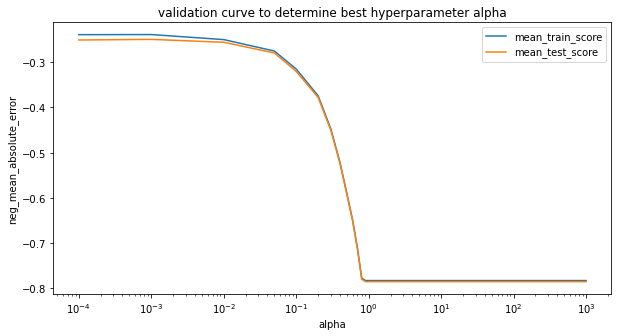

In [107]:
# potting validation curve to choose the best hyperparameter
plt.figure(figsize= (10,5))
plt.plot(grid_lasso_results_dataframe['param_alpha'], grid_lasso_results_dataframe['mean_train_score'], label = 'mean_train_score')
plt.plot(grid_lasso_results_dataframe['param_alpha'], grid_lasso_results_dataframe['mean_test_score'], label = 'mean_test_score')
plt.legend(loc = 0)
plt.xlabel('alpha')
plt.xscale('log')
plt.ylabel('neg_mean_absolute_error')
plt.title('validation curve to determine best hyperparameter alpha')
plt.show()

- We can see that train and test scores almost follow in touching each other. Let's further refine the range of alpha in order to excat precise understanding in alpha selection by changing the scoring metric used in grid search cv.

In [108]:
# performing hyperparameter tuning for lasso regularization term using r2_score as scoring metric

# defining params for passing into Gridsearchcv
params = [{'alpha':  [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}]

# defining cross validation scheme
folds = KFold(n_splits= 5, shuffle= True, random_state= 100)

# defining ridge model object
lasso_model = Lasso(random_state= 100)

# defining grid search model object
grid_lasso_model = GridSearchCV(lasso_model, param_grid= params, n_jobs= -1, 
                                verbose = True, scoring= 'r2', cv= folds, return_train_score= True)
# fitting grid model object on top of the data
grid_lasso_model.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    0.4s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=100,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                    0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                    100, 500, 1000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=True)

In [109]:
# checking the results of the grid lasso in dataframe
grid_lasso_results_dataframe_1 = pd.DataFrame(grid_lasso_model.cv_results_)
# checking the head of the dataframe
grid_lasso_results_dataframe_1.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.06024       0.01318          0.00219         0.00040     0.00010   
1        0.04408       0.01941          0.00558         0.00570     0.00100   
2        0.01197       0.00662          0.00200         0.00000     0.01000   
3        0.00718       0.00116          0.00259         0.00049     0.05000   
4        0.00738       0.00174          0.00219         0.00040     0.10000   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}            0.87510            0.72750            0.83616   
1   {'alpha': 0.001}            0.87928            0.72572            0.83664   
2    {'alpha': 0.01}            0.87556            0.70992            0.83277   
3    {'alpha': 0.05}            0.85338            0.69276            0.82090   
4     {'alpha': 0.1}            0.80648            0.68096            0.79751   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0            0.89453            0.88929          0.84452         0.06197   
1            0.89526            0.89074          0.84553         0.06339   
2            0.88771            0.88014          0.83722         0.06646   
3            0.86394            0.83657          0.81351         0.06213   
4            0.82079            0.77968          0.77709         0.04988   

   rank_test_score  split0_train_score  split1_train_score  \
0                2             0.86533             0.89501   
1                1             0.86378             0.89462   
2                3             0.84946             0.88337   
3                4             0.82132             0.85935   
4                5             0.78164             0.82123   

   split2_train_score  split3_train_score  split4_train_score  \
0             0.87451             0.86186             0.86127   
1             0.87350             0.86064             0.85987   
2             0.86145             0.84892             0.84681   
3             0.83466             0.82043             0.81848   
4             0.79503             0.78209             0.78245   

   mean_train_score  std_train_score  
0           0.87159          0.01263  
1           0.87048          0.01301  
2           0.85800          0.01368  
3           0.83085          0.01536  
4           0.79249          0.01523

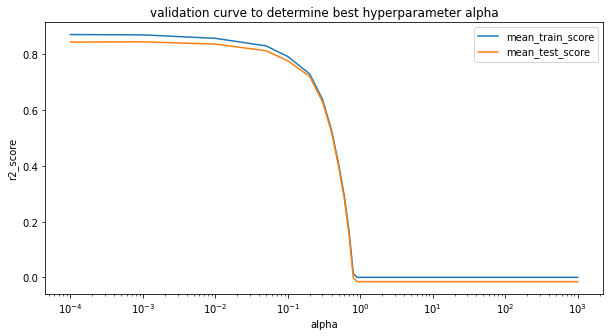

In [110]:
# checking the results of the dataframe using validation curve
plt.figure(figsize= (10,5))
plt.plot(grid_lasso_results_dataframe_1['param_alpha'], grid_lasso_results_dataframe_1['mean_train_score'], label = 'mean_train_score')
plt.plot(grid_lasso_results_dataframe_1['param_alpha'], grid_lasso_results_dataframe_1['mean_test_score'], label = 'mean_test_score')
plt.legend(loc = 0)
plt.xlabel('alpha')
plt.ylabel('r2_score')
plt.xscale('log')
plt.title('validation curve to determine best hyperparameter alpha')
plt.show()

- From above two validation curves we can see that upon changing the scoring metric also the validation curves are exactly same. Let's consider the best estimator resulted by grid search cv model object.

In [111]:
# checking the best estimator produced by grid search cv model upon using r2_scoring
grid_lasso_model.best_estimator_

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=100,
      selection='cyclic', tol=0.0001, warm_start=False)

- From above we can see that grid_lasso_model has resulted with 0.001 as best estimator. Let's proceed with considering alpha = 0.001

In [112]:
# building lasso model considering alpha to be 0.001
lasso_model_tune = Lasso(alpha= 0.001, random_state= 100)

# fitting the data on top of the model object
lasso_model_tune.fit(X_train,y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=100,
      selection='cyclic', tol=0.0001, warm_start=False)

In [113]:
# checking the coefficients provided by lasso
lasso_coeff = lasso_model_tune.coef_
lasso_coeff

array([-0.07612651,  0.23027548,  0.1534848 ,  0.        ,  0.01799963,
        0.        ,  0.04662906,  0.        ,  0.01592899, -0.01845189,
        0.35826087,  0.08816218,  0.12536073, -0.16737587,  0.07161032,
       -0.18323126, -0.06668215, -0.09393876,  0.26185338, -0.15872547,
       -0.0604924 ,  0.1756171 , -0.06069781,  0.        ,  0.02629641,
        0.00604425,  0.        ,  0.        ,  0.02455301,  0.12491793,
       -0.00999323, -0.03527961,  0.07255533,  0.0791218 ,  0.10747641,
       -0.08116555, -0.05708146, -0.05840288, -0.17413592,  0.09850183])

In [114]:
# checking the coefficient values in a dataframe
lasso_coeff_dataframe = pd.DataFrame()

# adding column corresponding to features
lasso_coeff_dataframe['Features'] = X_train.columns

# adding columns corresponding to coefficient values
lasso_coeff_dataframe['Coefficients'] = lasso_model_tune.coef_

# sorting the dataframe by coefficients values
lasso_coeff_dataframe.sort_values(by = 'Coefficients', ascending = False, inplace = True)

# checking the head of the dataframe
lasso_coeff_dataframe.head()

Features  Coefficients
10             GrLivArea       0.35826
18  Neighborhood_NridgHt       0.26185
1            OverallQual       0.23028
21  Neighborhood_Somerst       0.17562
2            OverallCond       0.15348

In [115]:
# making predictions on train and test using lasso model
y_train_pred_lasso  = lasso_model_tune.predict(X_train)
y_test_pred_lasso = lasso_model_tune.predict(X_test)

In [116]:
# assessing the performance of the model using r2_score
r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)
print('r2 score on train dataset: {}'.format(r2_train_lasso))
print('r2 score on test dataset: {}'.format(r2_test_lasso))

r2 score on train dataset: 0.8680404744480155
r2 score on test dataset: 0.8760318183359844


- From above scores we can see that test score is slightly higher than train score which is an indication that model might be generalized. <br><br>
- Let's further compare the models using cross validation scores using box plots.

## Box Plot Comparison of Models Based on Cross Validation Scores

In [117]:
# defining cross validation scheme
folds = KFold(n_splits= 5, shuffle= True, random_state = 100)

# defining cross validation score
ridge_scores = []
lasso_scores = []
model_dict  = {'ridge_model' : ridge_model_tune, 'lasso_model': lasso_model_tune}
for model_name, model_object in model_dict.items():
    if model_name == 'ridge_model':
        cross_validation_scores = cross_val_score(model_object, X_train, y_train, cv = folds, scoring = 'r2')
        ridge_scores.append(cross_validation_scores)
    else:
        cross_validation_scores = cross_val_score(model_object, X_train, y_train, cv = folds, scoring = 'r2')
        lasso_scores.append(cross_validation_scores)
print('The mean of cross validation scores of ridge model: {}'.format(np.mean(ridge_scores[0])))
print('The variance present in cross validation scores in ridge model: {}'.format(np.var(ridge_scores[0])))
print('The variance present in cross validation scores in lasso model: {}'.format(np.var(lasso_scores[0])))
print('The mean of cross validation scores of lasso model: {}'.format(np.mean(lasso_scores[0])))

The mean of cross validation scores of ridge model: 0.8456647513297497
The variance present in cross validation scores in ridge model: 0.004220288421520071
The variance present in cross validation scores in lasso model: 0.004018080446568303
The mean of cross validation scores of lasso model: 0.8455263554456529


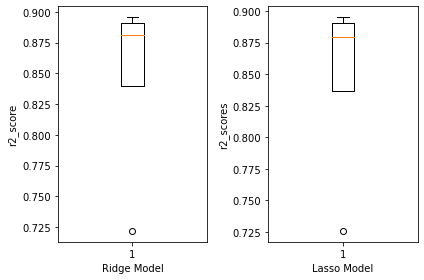

In [118]:
# plotting the results using box plot
plt.figure()
plt.subplot(1,2,1)
plt.boxplot(ridge_scores[0])
plt.xlabel('Ridge Model')
plt.ylabel('r2_score')
plt.subplot(1,2,2)
plt.boxplot(lasso_scores[0])
plt.xlabel('Lasso Model')
plt.ylabel('r2_scores')
plt.tight_layout()
plt.show()

- From above we can see that Ridge model has slightly higher median value when compared to lasso model but upon checking variance in cross validation scores lasso model has slightly lesser variance when compared to ridge model which is an indication that lasso model is more stable when compared to ridge model.

## Summary

#### Company questions:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.
- The optimal value of lambda for ridge and lasso regression.

###### feature importance in relation with sale price of house from Ridge Model

In [119]:
# checking coefficients produced by ridge model
ridge_coeff_dataframe.head(10)

Features  Coefficients
1            OverallQual       0.23336
10             GrLivArea       0.19662
18  Neighborhood_NridgHt       0.18395
2            OverallCond       0.14980
8               2ndFlrSF       0.13841
12            GarageCars       0.12862
21  Neighborhood_Somerst       0.12497
7               1stFlrSF       0.10896
29      Foundation_PConc       0.10858
34      BsmtFinType1_GLQ       0.09709

- From above dataframe we can see top 10 features produced by Ridge Model which are significant and how well they determine the price of the house.

######  feature importance in relation with sale price of house from lasso Model

In [120]:
# checking coefficients produced by lasso model
lasso_coeff_dataframe.head(10)

Features  Coefficients
10             GrLivArea       0.35826
18  Neighborhood_NridgHt       0.26185
1            OverallQual       0.23028
21  Neighborhood_Somerst       0.17562
2            OverallCond       0.15348
12            GarageCars       0.12536
29      Foundation_PConc       0.12492
34      BsmtFinType1_GLQ       0.10748
39     GarageType_Attchd       0.09850
11          BsmtFullBath       0.08816

- From above dataframe we can see top 10 features produced by Lasso Model which are significant and how well they determine the price of the house.

- The optimal lambda value for Ridge and Lasso are:
- Ridge = 25
- Lasso = 0.001

## Subjective Questions

__Question 1:__
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

Answer) The optimal value of lambda for ridge and lasso are: 
- Ridge = 25
- Lasso = 0.001

#### Considering double the value of alpha value in case of Ridge Regression

In [121]:
# defining the ridge model object
ridge_model_exp = Ridge(alpha= 50, random_state= 100)
# fitting the model on top of the data
ridge_model_exp.fit(X_train, y_train)

Ridge(alpha=50, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=100, solver='auto', tol=0.001)

In [122]:
# checking the coefficients produced by ridge in a dataframe
ridge_coeff_exp_dataframe = pd.DataFrame()
ridge_coeff_exp_dataframe['Features'] = X_train.columns
ridge_coeff_exp_dataframe['Coefficients_exp'] = ridge_model_exp.coef_
ridge_coeff_exp_dataframe.sort_values(by = 'Coefficients_exp', ascending = False, inplace = True)
# checking the head of the dataframe
ridge_coeff_exp_dataframe.head()

Features  Coefficients_exp
1            OverallQual           0.23608
10             GrLivArea           0.18961
2            OverallCond           0.14474
18  Neighborhood_NridgHt           0.14106
12            GarageCars           0.13095

- After implementing the change from above dataframe we can see top 5 features which are significant in making prediction about sale price of the house.

In [123]:
# coefficients with optimum hyperparameter i.e. alpha = 25
ridge_coeff_dataframe.head()

Features  Coefficients
1            OverallQual       0.23336
10             GrLivArea       0.19662
18  Neighborhood_NridgHt       0.18395
2            OverallCond       0.14980
8               2ndFlrSF       0.13841

- These are coefficients which are produced by consideirng optimum hyperparameter upon tuning which is 25.

In [124]:
# making predictions on train set using ridge model
y_train_pred_exp_ridge = ridge_model_exp.predict(X_train)

# making predictions on test dataset using ridge model
y_test_pred_exp_ridge = ridge_model_exp.predict(X_test)

In [125]:
# checking r2_score obtained using the model on train and test sets
r2_train_exp_ridge = r2_score(y_train, y_train_pred_exp_ridge)
r2_test_exp_ridge = r2_score(y_test, y_test_pred_exp_ridge)
print('The r2_score on train set: {}'.format(r2_train_exp_ridge))
print('The r2_score on test set: {}'.format(r2_test_exp_ridge))

The r2_score on train set: 0.8648936617311274
The r2_score on test set: 0.8756939128688572


- Upon doubling the alpha value we can see that there is no much change in prediction levels before and after. There is slight change in coefficient values thus altering the significance level in making predition about target variable.

#### Considering double the value of alpha value in case of Lasso Regression

In [126]:
# defining Lasso experimental model object
lasso_exp_model = Lasso(alpha= 0.002, random_state= 100)
# fitting the data on top of the model object
lasso_exp_model.fit(X_train, y_train)

Lasso(alpha=0.002, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=100,
      selection='cyclic', tol=0.0001, warm_start=False)

In [127]:
# checking coefficients resulted in dataframe
lasso_coeff_exp_dataframe = pd.DataFrame()
# adding column for features
lasso_coeff_exp_dataframe['Features'] = X_train.columns
# adding column for coefficients
lasso_coeff_exp_dataframe['Coefficients'] = lasso_exp_model.coef_
# sorting the dataframe in based on coefficients
lasso_coeff_exp_dataframe.sort_values(by = 'Coefficients', ascending = False, inplace= True)
# checking head of the dataframe
lasso_coeff_exp_dataframe.head()

Features  Coefficients
10             GrLivArea       0.36097
18  Neighborhood_NridgHt       0.24834
1            OverallQual       0.23718
2            OverallCond       0.15193
21  Neighborhood_Somerst       0.14868

In [128]:
# checking dataframe before implementing the changes
lasso_coeff_dataframe.head()

Features  Coefficients
10             GrLivArea       0.35826
18  Neighborhood_NridgHt       0.26185
1            OverallQual       0.23028
21  Neighborhood_Somerst       0.17562
2            OverallCond       0.15348

- From two dataframes we can see that there has been slight change order to top 5 columns since there has been slight change in coefficient values.

In [129]:
# making predictions using experimental model
y_train_exp_pred_lasso  = lasso_exp_model.predict(X_train)
y_test_exp_pred_lasso = lasso_exp_model.predict(X_test)

In [130]:
# assessing the model performance based on r2_score
r2_train_exp_lasso = r2_score(y_train, y_train_exp_pred_lasso)
r2_test_exp_lasso = r2_score(y_test, y_test_exp_pred_lasso)
print('The r2_score on train data {}'.format(r2_train_exp_lasso))
print('The r2_score on test data {}'.format(r2_test_exp_lasso))

The r2_score on train data 0.8668590061229853
The r2_score on test data 0.8767511573779935


- From above r2_scores we can see that there has been no much significant change in performance of the model upon doubling alpha hyperparameter.

__Question 3:__
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [131]:
# checking for the top 5 features before implementing the change
lasso_coeff_dataframe.head(10)

Features  Coefficients
10             GrLivArea       0.35826
18  Neighborhood_NridgHt       0.26185
1            OverallQual       0.23028
21  Neighborhood_Somerst       0.17562
2            OverallCond       0.15348
12            GarageCars       0.12536
29      Foundation_PConc       0.12492
34      BsmtFinType1_GLQ       0.10748
39     GarageType_Attchd       0.09850
11          BsmtFullBath       0.08816

In [132]:
# creating copy of X_train before removing top 5 features from X_train
X_train_copy = X_train.copy()

In [133]:
# creating a list for the top features to drop from X_train
top5_lasso = list(lasso_coeff_dataframe['Features'][:5].values)
top5_lasso

['GrLivArea',
 'Neighborhood_NridgHt',
 'OverallQual',
 'Neighborhood_Somerst',
 'OverallCond']

In [134]:
# dropping these top_5 features from X_train_copy
X_train_copy.drop(top5_lasso, axis =1, inplace = True)

In [135]:
# performing hyperparameter tuning to select alpha

# defining params for passing into Gridsearchcv
params = [{'alpha':  [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}]

# defining cross validation scheme
folds = KFold(n_splits= 5, shuffle= True, random_state= 100)

# defining ridge model object
lasso_model_exp = Lasso(random_state= 100)

# defining grid search model object
grid_lasso_exp_model = GridSearchCV(lasso_model_exp, param_grid= params, n_jobs= -1, 
                                verbose = True, scoring= 'r2', cv= folds, return_train_score= True)
# fitting grid model object on top of the data
grid_lasso_exp_model.fit(X_train_copy, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    0.4s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=100,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                    0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                    100, 500, 1000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=True)

In [136]:
# checking the results of grid search in dataframe
grid_lasso_results_exp_dataframe = pd.DataFrame(grid_lasso_exp_model.cv_results_)
# checking the head of the dataframe
grid_lasso_results_exp_dataframe.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.01576       0.00870          0.00219         0.00075     0.00010   
1        0.00917       0.00040          0.00200         0.00063     0.00100   
2        0.00539       0.00120          0.00219         0.00040     0.01000   
3        0.00618       0.00075          0.00199         0.00000     0.05000   
4        0.00658       0.00102          0.00200         0.00000     0.10000   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}            0.82809            0.66963            0.79979   
1   {'alpha': 0.001}            0.83057            0.66467            0.79992   
2    {'alpha': 0.01}            0.82645            0.64948            0.79541   
3    {'alpha': 0.05}            0.79052            0.61115            0.76307   
4     {'alpha': 0.1}            0.73573            0.60404            0.71872   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0            0.84220            0.83801          0.79554         0.06467   
1            0.84119            0.84089          0.79545         0.06710   
2            0.83636            0.83565          0.78867         0.07117   
3            0.80929            0.79287          0.75338         0.07265   
4            0.75750            0.73186          0.70957         0.05422   

   rank_test_score  split0_train_score  split1_train_score  \
0                1             0.82126             0.85359   
1                2             0.81994             0.85295   
2                3             0.80603             0.84054   
3                4             0.76580             0.80952   
4                5             0.71648             0.76655   

   split2_train_score  split3_train_score  split4_train_score  \
0             0.82849             0.81874             0.81831   
1             0.82745             0.81749             0.81682   
2             0.81449             0.80506             0.80205   
3             0.77634             0.76477             0.76363   
4             0.72901             0.71457             0.71109   

   mean_train_score  std_train_score  
0           0.82808          0.01327  
1           0.82693          0.01355  
2           0.81363          0.01407  
3           0.77601          0.01736  
4           0.72754          0.02042

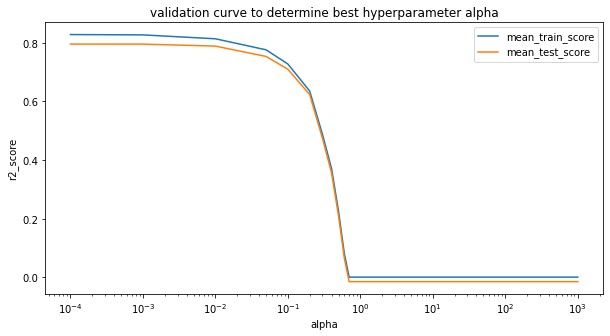

In [137]:
# visualizing the results using validation curve
plt.figure(figsize= (10,5))
plt.plot(grid_lasso_results_exp_dataframe['param_alpha'], grid_lasso_results_exp_dataframe['mean_train_score'], label = 'mean_train_score')
plt.plot(grid_lasso_results_exp_dataframe['param_alpha'], grid_lasso_results_exp_dataframe['mean_test_score'], label = 'mean_test_score')
plt.legend(loc = 0)
plt.xlabel('alpha')
plt.ylabel('r2_score')
plt.xscale('log')
plt.title('validation curve to determine best hyperparameter alpha')
plt.show()

- From above plot we can consider alpha value to be 0.001 so that both train and test scores are considerably high and close to each other so as to avoid overfitting issues.

In [138]:
# building lasso model considering alpha = 0.001
lasso_model_exp1 = Lasso(alpha= 0.001, random_state= 100)
# fitting the data on top of the model object
lasso_model_exp1.fit(X_train_copy, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=100,
      selection='cyclic', tol=0.0001, warm_start=False)

In [139]:
# checking the coefficient values in a dataframe
lasso_coeff_exp_dataframe1 = pd.DataFrame()

# adding column corresponding to features
lasso_coeff_exp_dataframe1['Features'] = X_train_copy.columns

# adding columns corresponding to coefficient values
lasso_coeff_exp_dataframe1['Coefficients'] = lasso_model_exp1.coef_

# sorting the dataframe by coefficients values
lasso_coeff_exp_dataframe1.sort_values(by = 'Coefficients', ascending = False, inplace = True)

# checking the head of the dataframe
lasso_coeff_exp_dataframe1.head()

Features  Coefficients
6            2ndFlrSF       0.36065
5            1stFlrSF       0.27066
24   Foundation_PConc       0.22845
29   BsmtFinType1_GLQ       0.17935
22  Foundation_BrkTil       0.17019

__From above we can see that top 5 features after implementing changes are:__
- 2ndFlrSF
- 1stFlrSF
- Foundation_PConc
- BsmtFinType1_GLQ
- Foundation_BrkTil